# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
from sklearn.metrics import mean_squared_error

#Warnings
warnings.filterwarnings('ignore')


# Format round off to two decimal places in pandas 
pd.options.display.float_format = '{: .2f}'.format

# Gerenal Plots
#plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')

In [2]:
# Cargamos los datos

data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')


In [3]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0  2020.00  2020-01-01 00:00:00  enero  Miércoles       1.00         0.00   
1  2020.00  2020-01-01 00:00:00  enero  Miércoles       1.00         0.00   
2  2020.00  2020-01-01 00:00:00  enero  Miércoles       1.00         0.00   
3  2020.00  2020-01-01 00:00:00  enero  Miércoles       1.00         0.00   
4  2020.00  2020-01-01 00:00:00  enero  Miércoles       1.00         0.00   

   hora_fin estacion tipo_vehiculo forma_pago  \
0      1.00  ALBERDI          Auto   Efectivo   
1      1.00  ALBERDI          Auto   Efectivo   
2      1.00  ALBERDI          Auto  Rec.Deuda   
3      1.00  ALBERDI          Auto  Rec.Deuda   
4      1.00  ALBERDI          Auto  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro           24.00  
1                          Efectivo  Provincia           80.00  
2                Paso en Infracción  Provincia            1.00  
3  Paso en infracción con Multa LPR     Centro            1.00  
4  Paso en infracción con Multa LPR  Provincia            1.00

In [4]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [5]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [6]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

In [7]:
data_2016.info()
data_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
1     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
2     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
3     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
4     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              32  
1       Liviano      AUPASS               9  
2       Liviano  NO COBRADO               1  
3       Liviano    EFECTIVO               4  
4       Liviano      EXENTO               3

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [8]:
print(data_2020['estacion'].unique())
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())
print(data_2016['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [9]:
print(data_2020['sentido'].unique())
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())
print(data_2016['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [10]:
print(data_2020['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())
print(data_2016['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [11]:
print(data_2020['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())
print(data_2016['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


##### Podemos decir entonces que los años 2016, 2017, 2018, 2019 y 2020 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB) - en 2020 estan en Mayusculas

**sentido**: Centro o Provincia

**tipo_vehiculo**: Desde 2016 a 2019 se divide en Liviano o Pesado. A partir del 2020, se agregan varias categorías para ser más específicos:

Auto
Auto con trailer
Moto
N/D
Pago Doble Auto
Pago Doble Auto con trailer / Pesado 2 Ejes
Pago doble Moto
Pesados 2 Ejes
Pesados 3 Ejes
Pesados 4 Ejes
Pesados 5 Ejes
Pesados 6 Ejes

**forma_pago**: Hay varias y varian entre los años. La que se mantiene siempre es Efectivo. El 2020, es el que más difiere de todos los años:

Efectivo
Rec.Deuda
Tarjeta Magnética
Tag
Exento
Violación
CPP
Mercado Pago

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo** - COMENTARIO ORIGINAL NOTEBOOK


#### Unificación de Dataset

In [12]:
#Unimos los 4 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
#Dataset para Illia solo Efectivo
dataset = pd.concat([data_2019, data_2018, data_2017, data_2016])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar

dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

In [13]:
# También generamos la unificación de la estación Illia con todas las formas de pago, para todos los años que están completos
dataset_illia_2016 = data_2016.loc[data_2016['estacion']=='Illia']
dataset_illia_2017 = data_2017.loc[data_2017['estacion']=='Illia']
dataset_illia_2018 = data_2018.loc[data_2018['estacion']=='Illia']
dataset_illia_2019 = data_2019.loc[data_2019['estacion']=='Illia']

#Unimos los 4 datasets
dataset1 = pd.concat([dataset_illia_2019, dataset_illia_2018, dataset_illia_2017, dataset_illia_2016])

#Quitamos las columnas que no vamos a utilizar

dataset1.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

#### Transformación a datatime

In [14]:
# Illia solo Efectivo
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha'], inplace = True)

dataset.head()

hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos  \
80          2  Martes     Centro       Liviano             537   
86          2  Martes     Centro        Pesado               1   
88          2  Martes  Provincia       Liviano             443   
94          2  Martes  Provincia        Pesado               1   
149         3  Martes     Centro       Liviano             769   

                 fecha2  
80  2019-01-01 02:00:00  
86  2019-01-01 02:00:00  
88  2019-01-01 02:00:00  
94  2019-01-01 02:00:00  
149 2019-01-01 03:00:00

In [15]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos  \
80          2  Martes     Centro       Liviano             537   
86          2  Martes     Centro        Pesado               1   
88          2  Martes  Provincia       Liviano             443   
94          2  Martes  Provincia        Pesado               1   
149         3  Martes     Centro       Liviano             769   

                  fecha  
80  2019-01-01 02:00:00  
86  2019-01-01 02:00:00  
88  2019-01-01 02:00:00  
94  2019-01-01 02:00:00  
149 2019-01-01 03:00:00

In [16]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)

dataset1.dtypes

fecha             object
hora_fin           int64
dia               object
sentido           object
tipo_vehiculo     object
cantidad_pasos     int64
dtype: object

In [17]:
# Illia todos los medios de pago

In [18]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset1['fecha2'] = pd.to_datetime(dataset1.fecha) + pd.to_timedelta(dataset1.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset1.drop(columns=['fecha'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset1.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reordenamos el dataset por fecha
dataset1.sort_values('fecha', inplace = True)
dataset1.reset_index(drop=True, inplace = True)

dataset1.dtypes



hora_fin                   int64
dia                       object
sentido                   object
tipo_vehiculo             object
cantidad_pasos             int64
fecha             datetime64[ns]
dtype: object

### Preguntas al Dataset

Text(0.5, 1.0, 'Trafico promedio por semana')

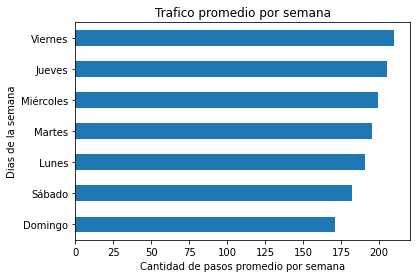

In [19]:


## Pregunta 1 = ¿Cuáles son los días mayor tráfico? - Solo Efectivo

#Días de Mayor Tráfico
pa=dataset.copy()
pa.drop(columns=['hora_fin'], inplace = True)
 

pa.groupby(['dia']).mean().sort_values(by='cantidad_pasos',ascending=True).plot.barh(legend = False)
plt.ylabel('Dias de la semana')
plt.xlabel('Cantidad de pasos promedio por semana')
plt.title('Trafico promedio por semana')

Text(0.5, 1.0, 'Trafico promedio por semana')

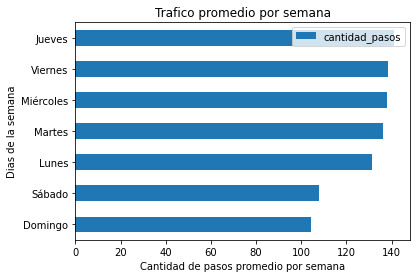

In [20]:

## Pregunta 1 = ¿Cuáles son los días mayor tráfico? - Todos los medios de pago

#Días de Mayor Tráfico
pa1=dataset1.copy()
pa1.drop(columns=['hora_fin'], inplace = True)
 

pa1.groupby(['dia']).mean().sort_values(by='cantidad_pasos',ascending=True).plot.barh(legend = True)
plt.ylabel('Dias de la semana')
plt.xlabel('Cantidad de pasos promedio por semana')
plt.title('Trafico promedio por semana')

Text(0.5, 1.0, 'Trafico promedio por hora')

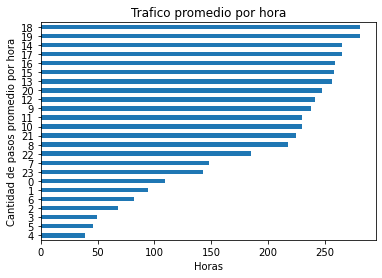

In [21]:
#Horario Mayor Trafico - Solo Efectivo

pb=dataset.copy()
pb.drop(columns=['dia'], inplace = True)
 
pb.groupby(['hora_fin']).mean().sort_values(by='cantidad_pasos',ascending=True).plot.barh(legend = False)
plt.xlabel('Horas')
plt.ylabel('Cantidad de pasos promedio por hora')
plt.title('Trafico promedio por hora')

Text(0.5, 1.0, 'Trafico promedio por hora')

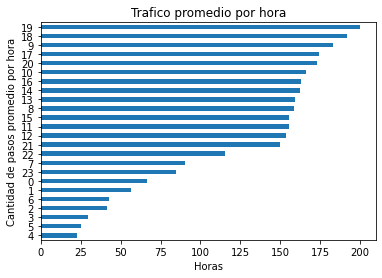

In [22]:
#Horario Mayor Trafico - todos los medios de Pago

pb1=dataset1.copy()
pb1.drop(columns=['dia'], inplace = True)
 
pb1.groupby(['hora_fin']).mean().sort_values(by='cantidad_pasos',ascending=True).plot.barh(legend = False)
plt.xlabel('Horas')
plt.ylabel('Cantidad de pasos promedio por hora')
plt.title('Trafico promedio por hora')

In [23]:
#Eliminamos las columnas que ya no necesitamos
dataset.drop(columns=['hora_fin', "dia"], inplace = True)
dataset1.drop(columns=['hora_fin', "dia"], inplace = True)


In [24]:
## Dias de Mayor Trafico 

In [25]:
top_by_day = dataset.sort_values('cantidad_pasos', ascending=False)
print("Dias de mayor trafico - Solo Efectivo")
print(top_by_day.head(10))
top_by_day1 = dataset1.sort_values('cantidad_pasos', ascending=False)
print("Dias de mayor trafico - Todos los medios de pago")
print(top_by_day1.head(10))

Dias de mayor trafico - Solo Efectivo
       sentido tipo_vehiculo  cantidad_pasos               fecha
73918   Centro       Liviano            2575 2016-09-11 20:00:00
63518   Centro       Liviano            2559 2016-08-07 19:00:00
78146   Centro       Liviano            2554 2016-09-25 18:00:00
63524   Centro       Liviano            2481 2016-08-07 20:00:00
39980   Centro       Liviano            2481 2016-05-19 18:00:00
78159   Centro       Liviano            2478 2016-09-25 19:00:00
182934  Centro       Liviano            2416 2017-09-17 19:00:00
86616   Centro       Liviano            2396 2016-10-23 19:00:00
63503   Centro       Liviano            2381 2016-08-07 18:00:00
81728   Centro       Liviano            2362 2016-10-07 12:00:00
Dias de mayor trafico - Todos los medios de pago
          sentido tipo_vehiculo  cantidad_pasos               fecha
959958     Centro       Liviano            5330 2019-05-29 09:00:00
737460     Centro       Liviano            5224 2018-06-25 09:

#### Valores Faltantes

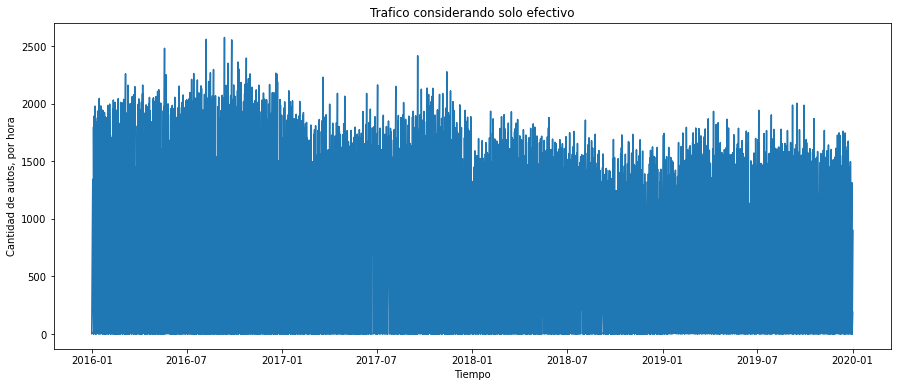

In [26]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title('Trafico considerando solo efectivo')
plt.show()

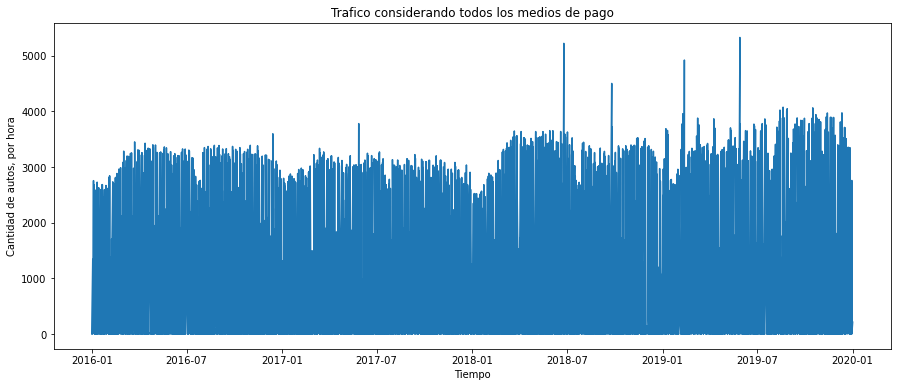

In [27]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset1.fecha, dataset1.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title('Trafico considerando todos los medios de pago')
plt.show()

In [28]:
#Resampleamos nuestros datos para agrupar por dia ambos dataset 
diario = dataset.resample('D', on = 'fecha').sum()
print("Solo Efectivo")
print(diario.shape)

diario1 = dataset1.resample('D', on = 'fecha').sum()
print("Solo Efectivo")
print(diario1.shape)

Solo Efectivo
(1461, 1)
Solo Efectivo
(1461, 1)


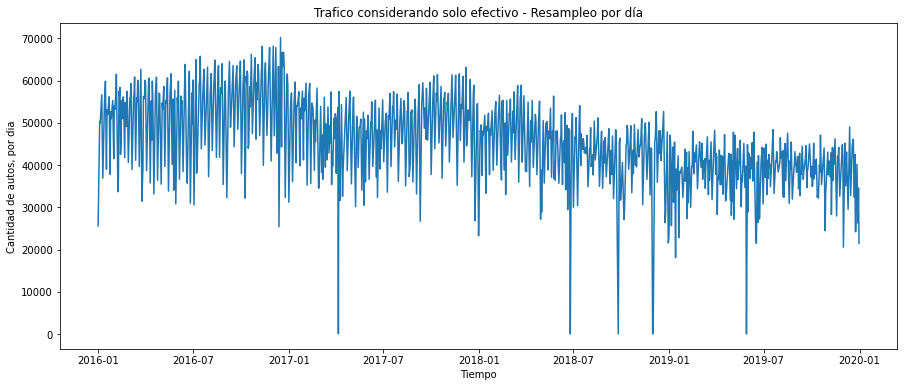

In [29]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Trafico considerando solo efectivo - Resampleo por día')
plt.show()


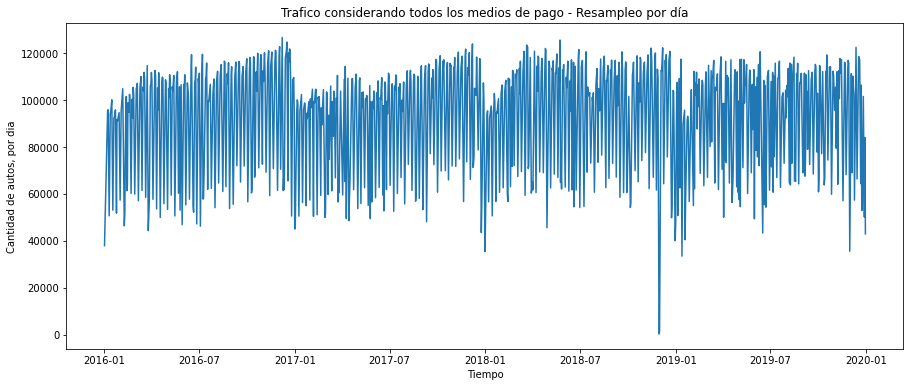

In [30]:
plt.figure(figsize = (15,6))
plt.plot(diario1.index, diario1.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Trafico considerando todos los medios de pago - Resampleo por día')
plt.show()

Exploramos los valores faltantes de la serie.

In [31]:
print("Cantidad de valores nulos considerando solo efectivo")
diario.isna().sum()

Cantidad de valores nulos considerando solo efectivo


cantidad_pasos    0
dtype: int64

In [32]:
print("Cantidad de valores nulos considerando todos los medios de pago")
diario1.isna().sum()

Cantidad de valores nulos considerando todos los medios de pago


cantidad_pasos    0
dtype: int64

Como conclusión, no hay Valores Faltantes dado que:

No hay valores nulos.

#### Valores atípicos

Graficamos por cada año para ver en detalle los valores atipicos

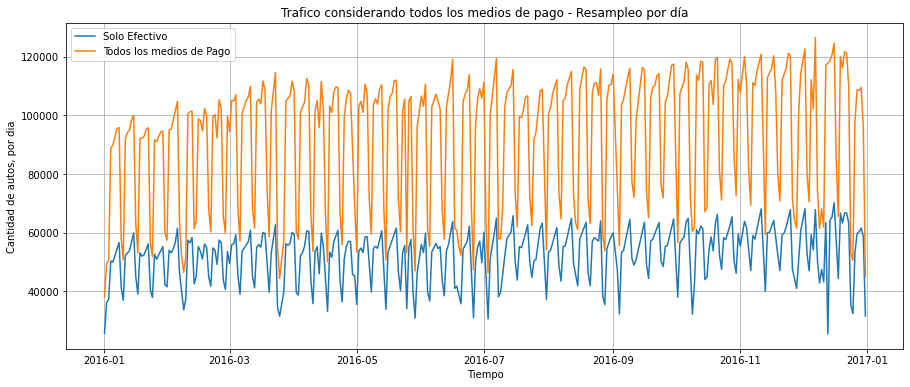

In [33]:
#2016
diario2016=diario.loc['2016-01-1':'2016-12-31']
diario12016=diario1.loc['2016-01-1':'2016-12-31']
    
plt.figure(figsize = (15,6))
plt.plot(diario2016.index, diario2016.cantidad_pasos, label = "Solo Efectivo")
plt.plot(diario12016.index, diario12016.cantidad_pasos, label = "Todos los medios de Pago")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Trafico considerando todos los medios de pago - Resampleo por día')
plt.grid()
plt.legend()
plt.show()


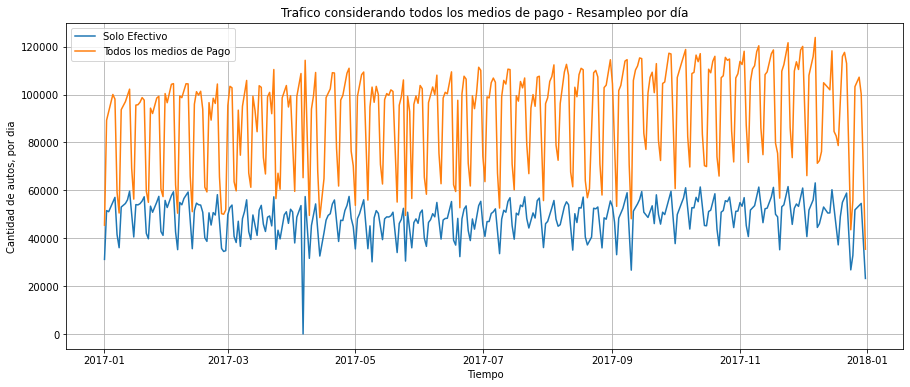

In [34]:
#2017
diario2017=diario.loc['2017-01-1':'2017-12-31']
diario12017=diario1.loc['2017-01-1':'2017-12-31']
    
plt.figure(figsize = (15,6))
plt.plot(diario2017.index, diario2017.cantidad_pasos, label = "Solo Efectivo")
plt.plot(diario12017.index, diario12017.cantidad_pasos, label = "Todos los medios de Pago")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Trafico considerando todos los medios de pago - Resampleo por día')
plt.grid()
plt.legend()
plt.show()

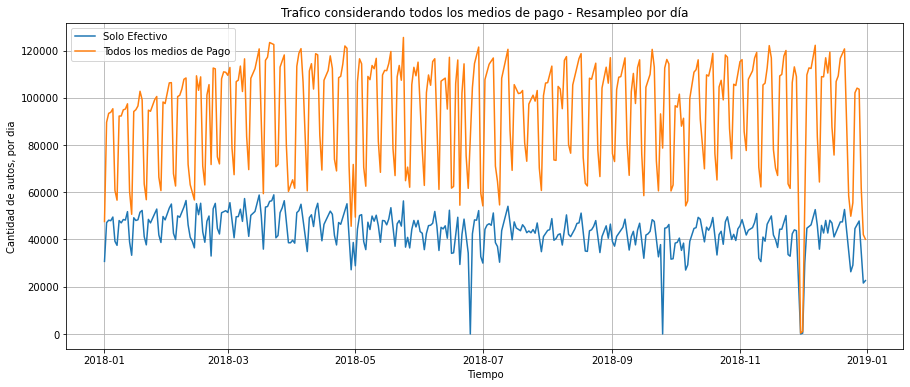

In [35]:
#2018
diario2018=diario.loc['2018-01-1':'2018-12-31']
diario12018=diario1.loc['2018-01-1':'2018-12-31']
    
plt.figure(figsize = (15,6))
plt.plot(diario2018.index, diario2018.cantidad_pasos, label = "Solo Efectivo")
plt.plot(diario12018.index, diario12018.cantidad_pasos, label = "Todos los medios de Pago")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Trafico considerando todos los medios de pago - Resampleo por día')
plt.grid()
plt.legend()
plt.show()


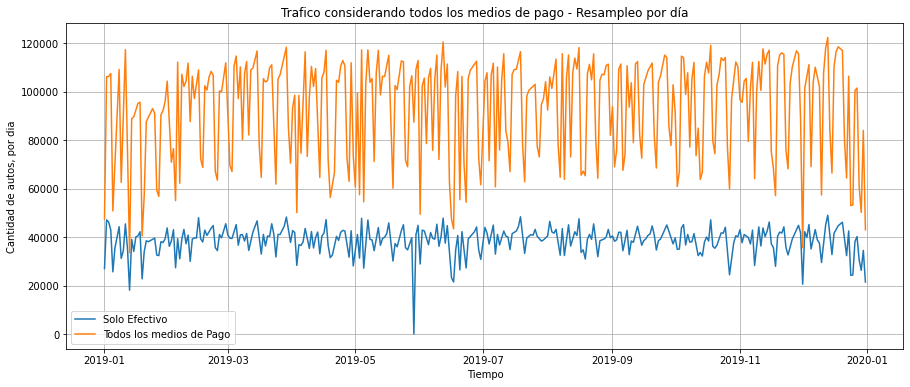

In [36]:
#2018
diario2019=diario.loc['2019-01-1':'2019-12-31']
diario12019=diario1.loc['2019-01-1':'2019-12-31']
    
plt.figure(figsize = (15,6))
plt.plot(diario2019.index, diario2019.cantidad_pasos, label = "Solo Efectivo")
plt.plot(diario12019.index, diario12019.cantidad_pasos, label = "Todos los medios de Pago")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Trafico considerando todos los medios de pago - Resampleo por día')
plt.grid()
plt.legend()
plt.show()

A lo largo de los 4 años observados aparecen 5 "picos negativos" (Valores Atípicos).

1 en el año 2017
3 en el año 2018
1 en el año 2019
Recordemos que los picos negativos se presentan en la autopista Illia con la modalidad de pago sólo EFECTIVO.

Se puede concluir que en los picos negativos, en la modalidad de "todos los medios de pago" tenemos valores por lo tanto han migrado a esa modalidad quizas por un paro sindical, corte u otro hecho como exceso de trafico.

A continuación, obtenemos los días donde la cantidad de vehículos registrados es inferior a 10.000:

In [37]:
atypical_discovery = diario[diario.cantidad_pasos < 10000]
atypical_discovery

cantidad_pasos
fecha                     
2017-04-06              40
2018-06-25               0
2018-09-25               0
2018-11-30               0
2018-12-01             350
2019-05-29               0

Observaciones
Se obtienen sólo 6 instancias de las cuales 4 registran 0 (cero) vehículos. Las otros 2, 40 autos y 350.

##### **Noticias relacionadas**

Si buscamos **noticias relacionadas** a las fechas analizadas encontramos que en su mayoría, corresponden a paros generales. Por otro lado, hay 3 fechas, que corresponden a la cumbre del G20 celebrada en Capital Federal.


**Paros Generales en Argentina:**
* En las fechas 2017-04-06, 2018-06-25, 2018-09-25 y el 2019-05-29 hubo paros generales.

Fuente: https://es.wikipedia.org/wiki/Anexo:Paros_y_planes_de_lucha_en_Argentina

**Cumbre G20**
* El 2018-11-29, 2018-11-30 y 2018-12-01 se desarrolló la cumbre del G20 en Capital Federal y varias autopistas fueron cerradas, incluyendo la Illia.

Fuente: https://www.buenosaires.gob.ar/jefedegobierno/xiii-cumbre-lideres-g20/noticias/cumbre-del-g20-cortes-de-calle-transito-y-servicios


In [38]:
diario.describe()

cantidad_pasos
count         1461.00
mean         45918.55
std           9203.06
min              0.00
25%          39669.00
50%          45555.00
75%          52810.00
max          70203.00

#### Interpolando Valores Atípicos
La interpolación consiste en hallar un dato dentro de un intervalo en el que conocemos los valores en los extremos.

###### Método Nearest.

Este método utiliza los valores numéricos más cernacos del índice. Es decir, asigna el valor al punto de datos más cercano.

In [39]:
# Genero filtro de atípicos y le asigno NaN
diariof = diario.copy() 
diariof[(diario.cantidad_pasos == 0) | (diario.cantidad_pasos <= 10000)] = np.NaN

# Cantidad de dias totales
print(diariof.shape)
# Cantidad de dias con NaN
print(diariof.isna().sum())
# Aplico Método Nearest
diariof = diariof.interpolate(method='nearest', k=4)
print(diario.isna().sum())


(1461, 1)
cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64


Obtuvimos los valores interpolados

A continuación graficamos en graficos independientes (por visualización) las diferencias obtenidas

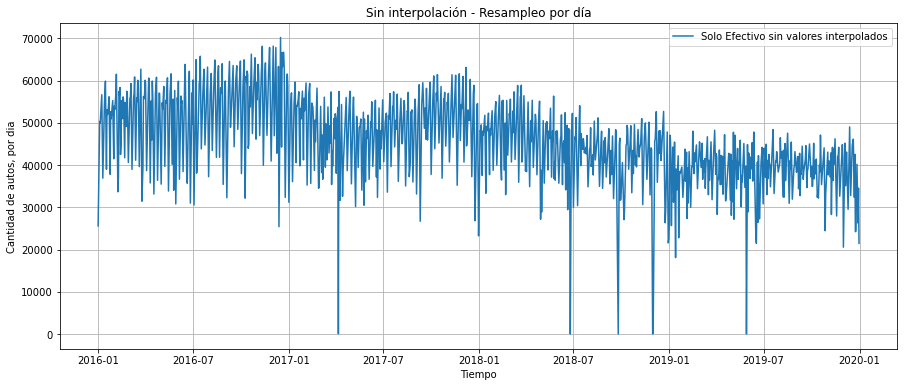

In [40]:
plt.figure(figsize = (15,6))
#plt.plot(diariof.index, diariof.cantidad_pasos, label = "Solo Efectivo con valores interpolados")
plt.plot(diario.index, diario.cantidad_pasos, label = "Solo Efectivo sin valores interpolados")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Sin interpolación - Resampleo por día')
plt.grid()
plt.legend()
plt.show()

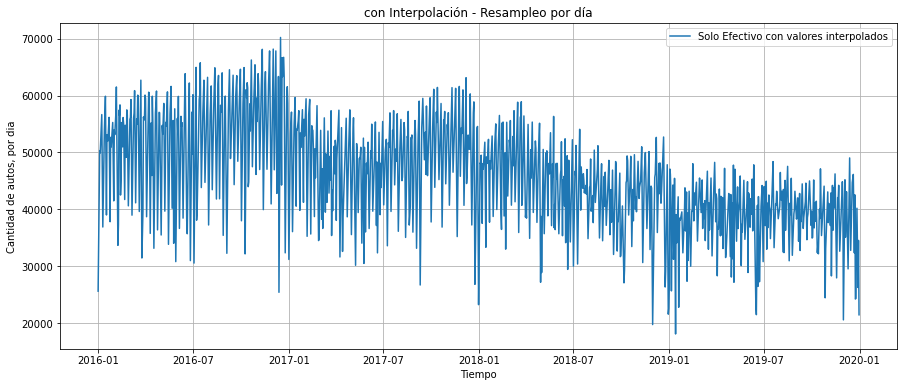

In [41]:
plt.figure(figsize = (15,6))
plt.plot(diariof.index, diariof.cantidad_pasos, label = "Solo Efectivo con valores interpolados")
#plt.plot(diario.index, diario.cantidad_pasos, label = "Solo Efectivo sin valores interpolados")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('con Interpolación - Resampleo por día')
plt.grid()
plt.legend()
plt.show()

Con los Valores Atipicos de la serie ya interpolados, se aprecia mejor la tendencia y estacionalidad de cada año.

La tendencia de la serie es definitivamente negativa a partir dicembre de 2017.

##### AUTOCORRELACION

Los gráficos de autocorrelación son muy utilizados en el análisis y la predicción de series de tiempo.

Podemos calcular la correlación de las observaciones de series de tiempo con observaciones con pasos de tiempo anteriores, llamados retrasos. Debido a que la correlación de las observaciones de la serie temporal se calcula con valores de la misma serie en momentos anteriores, esto se denomina correlación en serie o autocorrelación.

El coeficiente de correlación es un número negativo o positivo que describe una correlación negativa o positiva respectivamente. Un valor de cero indica que no hay correlación.

##### Un año

In [42]:
from math import sqrt

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

import seaborn as sns

from statsmodels import tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa import stattools


days = 365 # Cantidad de días en 1 año.
years = 1 # Cantidad de años observados.

nlags= days*years           
autocorr = stattools.acf(diariof, nlags= nlags)
autocorr.shape


(366,)

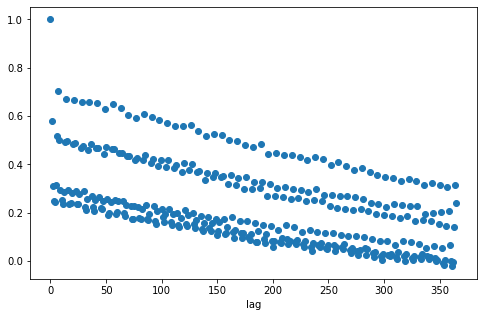

In [43]:
# Plot Autorcorrelación
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.show()

<Figure size 1080x1080 with 0 Axes>

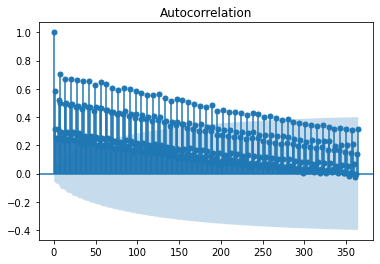

In [44]:
# Plot Autorcorrelación
plt.figure(figsize = (15,15))
plot_acf(diariof, lags = np.arange(nlags))
plt.show()

La ejecución del ejemplo crea una gráfica 2D que muestra el valor de retraso a lo largo del eje xy la correlación en el eje y entre -1 y 1.

Los intervalos de confianza se dibujan como un cono. De forma predeterminada, se establece en un intervalo de confianza del 95%, lo que sugiere que los valores de correlación fuera de este cono son muy probablemente una correlación y no una casualidad estadística.

##### Dos años

In [45]:
days = 365 # Cantidad de días en 1 año.
years = 2 # Cantidad de años observados.

nlags= days*years           
autocorr = stattools.acf(diariof, nlags= nlags)
autocorr.shape

(731,)

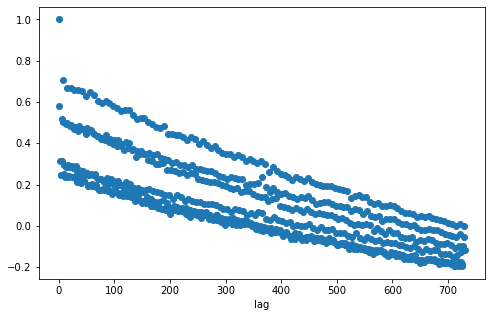

<Figure size 1080x1080 with 0 Axes>

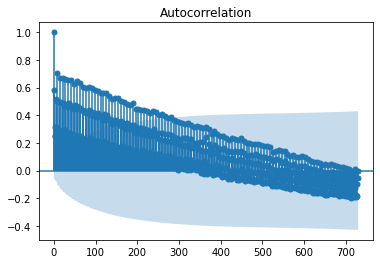

In [46]:
# Plot Autorcorrelación
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.show()

# Plot Autorcorrelación
plt.figure(figsize = (15,15))
plot_acf(diariof, lags = np.arange(nlags))
plt.show()

##### Tres años

In [47]:
days = 365 # Cantidad de días en 1 año.
years = 3 # Cantidad de años observados.

nlags= days*years           
autocorr = stattools.acf(diariof, nlags= nlags)
autocorr.shape

(1096,)

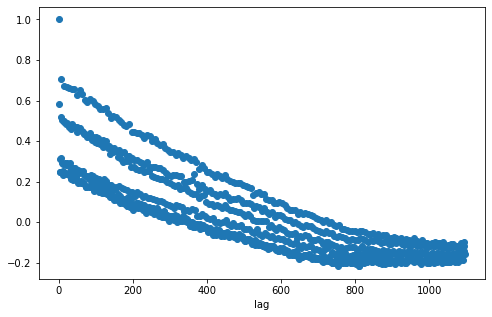

<Figure size 1080x1080 with 0 Axes>

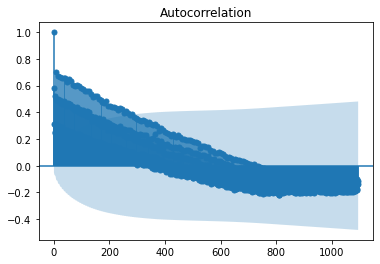

In [48]:
# Plot Autorcorrelación
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.show()

# Plot Autorcorrelación
plt.figure(figsize = (15,15))
plot_acf(diariof, lags = np.arange(nlags))
plt.show()

##### Cuatro años

In [49]:
days = 365 # Cantidad de días en 1 año.
years = 4 # Cantidad de años observados.

nlags= days*years           
autocorr = stattools.acf(diariof, nlags= nlags)
autocorr.shape

(1461,)

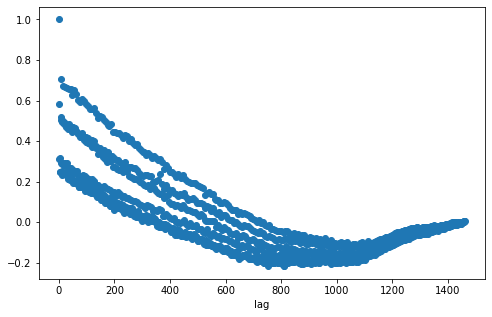

<Figure size 1080x1080 with 0 Axes>

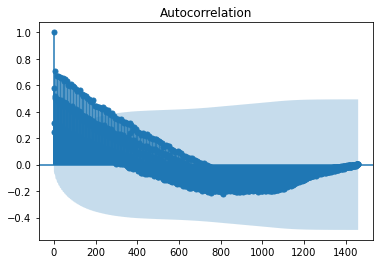

In [50]:
# Plot Autorcorrelación
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.show()

# Plot Autorcorrelación
plt.figure(figsize = (15,15))
plot_acf(diariof, lags = np.arange(nlags))
plt.show()

##### Conclusión Autocorrelaciones

Por el tipo de dataset con el que trabajamos, entiendo que es muy difícil poder apreciar y graficar la Autocorrelacion en una frecuencia diaria.

Es muy notorio como los datos de interés (zona no sombreada) se reducen a una pequeña parte.

##### Descomposición la Serie

La descomposición proporciona un modelo abstracto útil para **comprender** mejor los problemas durante el **análisis** y la **predicción** de series de tiempo.

Una **abstracción** útil para seleccionar métodos de pronóstico es dividir una serie de tiempo en **componentes**:
- **Sistemáticos**: Componentes de la serie temporal que tienen consistencia o recurrencia y pueden describirse y modelarse.
- **No sistemáticos**: componentes de la serie temporal que no se pueden modelar directamente.

Una serie de tiempo **consta de tres componentes sistemáticos** que incluyen **nivel, tendencia, estacionalidad y un** componente **no sistemático** llamado **ruido**.

Estos componentes se definen como:
- **Nivel**: el valor medio de la serie.
- **Tendencia**: el valor creciente o decreciente de la serie.
- **Estacionalidad**: el ciclo a corto plazo que se repite en la serie.
- **Ruido**: la variación aleatoria en la serie.

Es necesario pensar y abordar cada uno de estos componentes durante la preparación de datos, la selección del modelo y el ajuste del modelo.

Se puede abordar explícitamente en términos de modelar la tendencia y restarla en los datos, o implícitamente proporcionando suficiente historial para que un algoritmo modele una tendencia, si es que existe.

Un modelo aditivo sugiere que los componentes se sumen de la siguiente manera:

y(t) = Level + Trend + Seasonality + Noise

Un modelo aditivo es lineal en el que los cambios a lo largo del tiempo se realizan constantemente en la misma cantidad.

Una tendencia lineal es una línea recta.

Una estacionalidad lineal tiene la misma frecuencia (ancho de ciclos) y amplitud (altura de ciclos).

Un modelo multiplicativo sugiere que los componentes se multipliquen de la siguiente manera:

y(t) = Level * Trend * Seasonality * Noise

Un modelo multiplicativo no es lineal, como cuadrático o exponencial. Los cambios aumentan o disminuyen con el tiempo.

Una tendencia no lineal es una línea curva.

Una estacionalidad no lineal tiene una frecuencia y / o amplitud creciente o decreciente a lo largo del tiempo.

Los problemas del mundo real son complicados y ruidosos. Puede haber componentes aditivos y multiplicativos. Puede haber una tendencia creciente seguida de una tendencia decreciente. Puede haber ciclos no repetidos mezclados con los componentes de estacionalidad repetidos.


Es por ello que quizá se pueda pueda o no, catalogar la serie de tiempo como un modelo aditivo o multiplicativo.


Veamos qué sucede con nuestra serie. Para ello, utilizaremos la función season_decompose (). El objeto resultante contiene las matrices para acceder a los cuatro datos de la descomposición.

In [51]:
decomp_diaria_add = tsa.seasonal.seasonal_decompose(diariof.cantidad_pasos, model='additive', extrapolate_trend='freq')

decomp_diaria_mltp = tsa.seasonal.seasonal_decompose(diariof.cantidad_pasos, model='multiplicative', extrapolate_trend='freq')

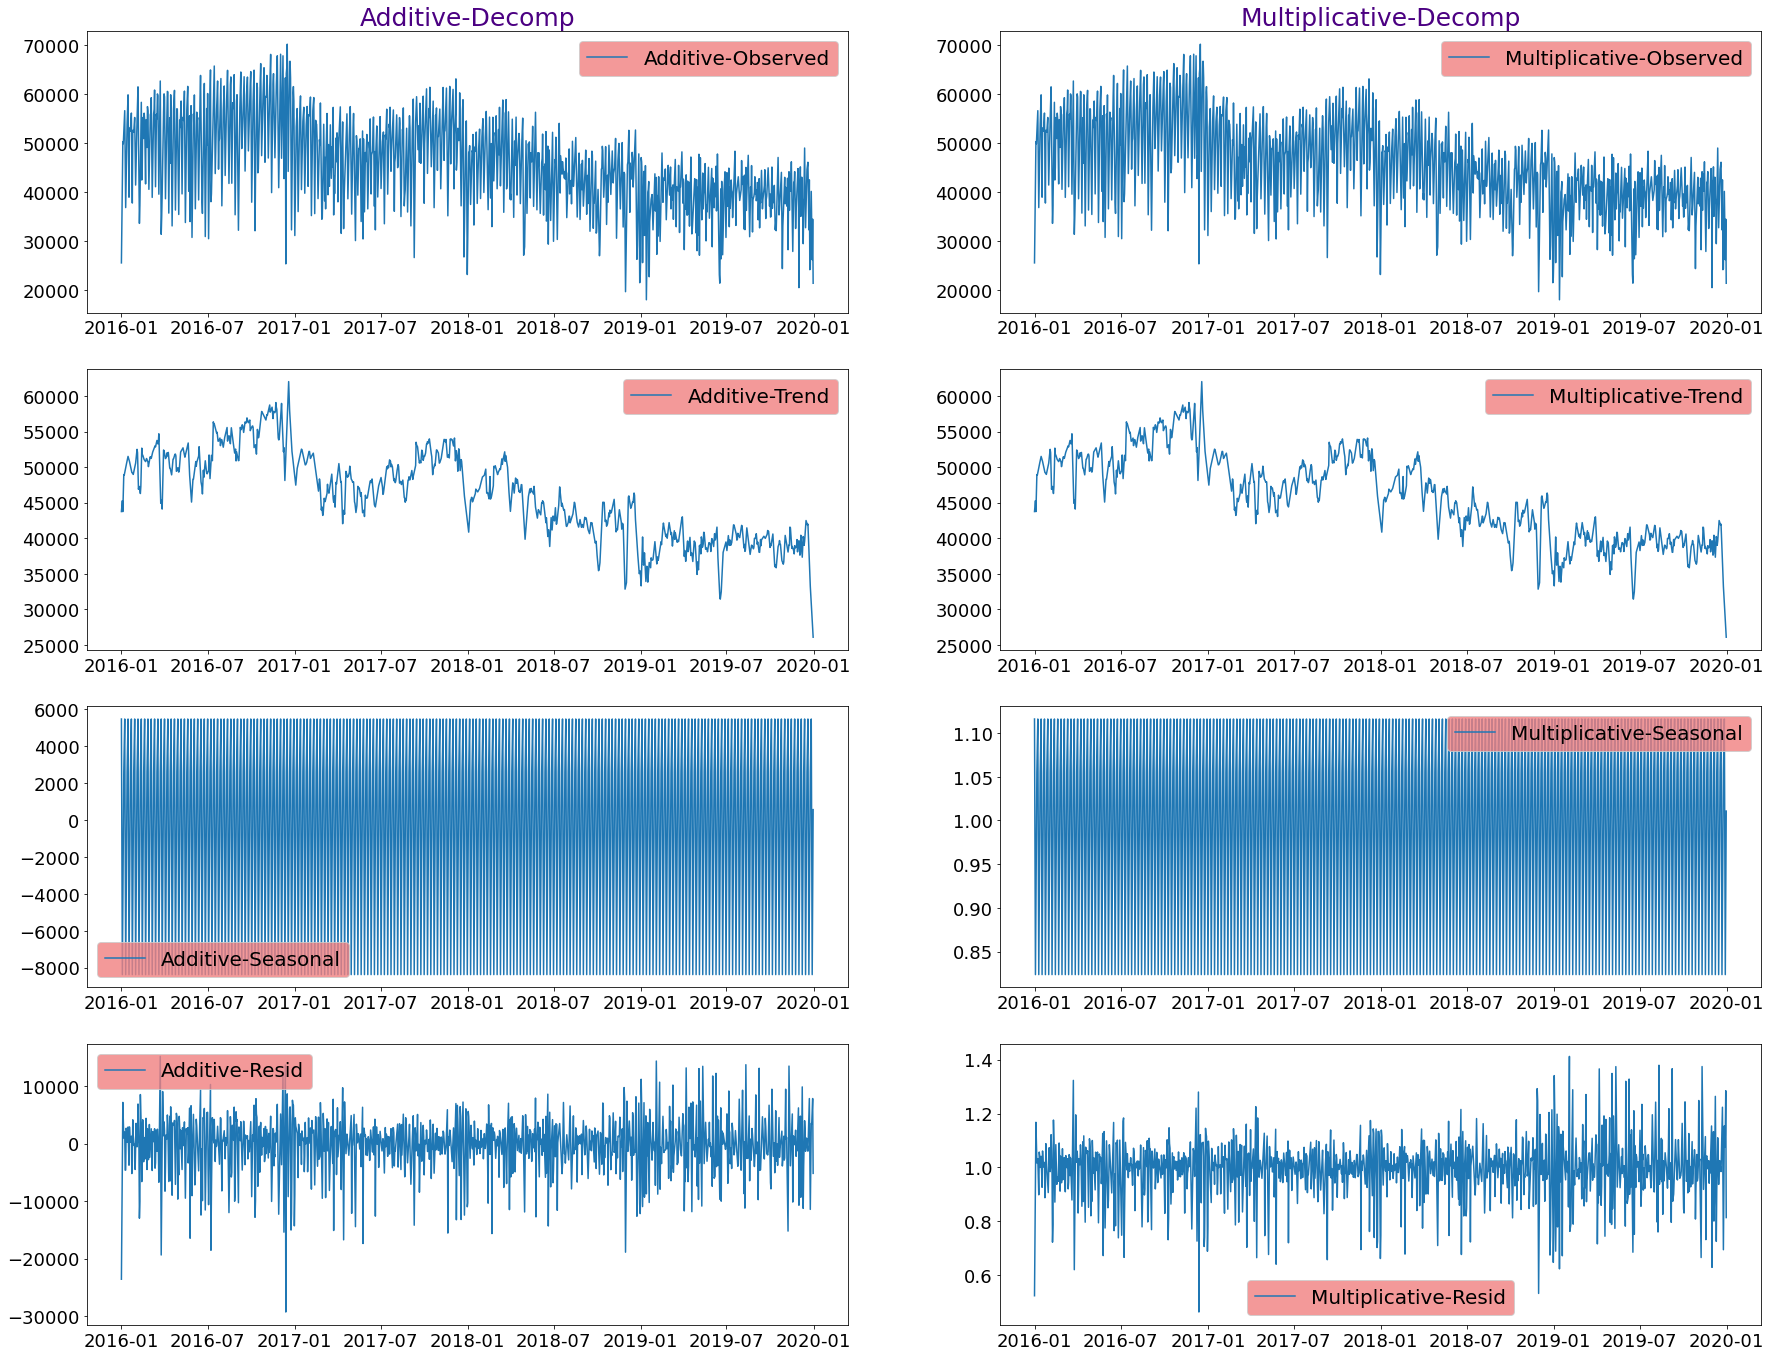

In [52]:
plt.figure(figsize=(30,30))

Gs= gs.GridSpec(5,2)
ax1= plt.subplot(Gs[0])
plt.title("Additive-Decomp", fontsize=25, color= "indigo")
plt.plot(decomp_diaria_add.observed, label= "Additive-Observed")
plt.legend(fontsize=20, facecolor= 'lightcoral')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)

ax2= plt.subplot(Gs[1])
plt.title("Multiplicative-Decomp", fontsize=25, color= "indigo")
plt.plot(decomp_diaria_mltp.observed, label= "Multiplicative-Observed")
plt.legend(fontsize=20, facecolor= 'lightcoral')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)

ax3= plt.subplot(Gs[2])
plt.plot(decomp_diaria_add.trend, label= "Additive-Trend")
plt.legend(fontsize=20, facecolor= 'lightcoral')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)

ax4= plt.subplot(Gs[3])
plt.plot(decomp_diaria_mltp.trend, label= "Multiplicative-Trend")
plt.legend(fontsize=20, facecolor= 'lightcoral')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)

ax5= plt.subplot(Gs[4])
plt.plot(decomp_diaria_add.seasonal, label= "Additive-Seasonal")
plt.legend(fontsize=20, facecolor= 'lightcoral')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)

ax6= plt.subplot(Gs[5])
plt.plot(decomp_diaria_mltp.seasonal, label= "Multiplicative-Seasonal")
plt.legend(fontsize=20, facecolor= 'lightcoral', loc= 1)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)


ax7= plt.subplot(Gs[6])
plt.plot(decomp_diaria_add.resid, label= "Additive-Resid")
plt.legend(fontsize=20, facecolor= 'lightcoral', loc= 2)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)

ax8= plt.subplot(Gs[7])
plt.plot(decomp_diaria_mltp.resid, label= "Multiplicative-Resid")
plt.legend(fontsize=20, facecolor= 'lightcoral')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)

plt.show()

Al descomponer la serie con ambos modelos, observados que los gráficos son similares.

Con la diferencia que en el modelo 'Aditivo' los "resids" tienen un comportamiento completamente aleatorio y una media en 0.

Este indicio indica que podríamos estar ante la presencia de "White Noise", al contrario de los "resids" devueltos con el modelo "Multiplicativo".

Podemos ver que la información de tendencia y estacionalidad extraída de la serie sí parece razonable. Los residuales también son interesantes, mostrando períodos de alta variabilidad en el primer semestre de 2016, a inicios de 2017 (el más notorio) y en el último año de la serie.

##### Modelo Aditivo
Value = Level + Trend + Seasonality + Noise

In [53]:
serie_aditiva_check = pd.concat(
    [
     decomp_diaria_add.seasonal, 
     decomp_diaria_add.trend, 
     decomp_diaria_add.resid, 
     decomp_diaria_add.observed
    ], axis=1)
serie_aditiva_check.columns = ['seasonal', 'trend', 'resid', 'actual_values']
serie_aditiva_check.head()

seasonal     trend     resid  actual_values
fecha                                                  
2016-01-01   5449.91  43746.11 -23594.02       25602.00
2016-01-02  -3573.01  44511.41  -4802.41       36136.00
2016-01-03  -8374.30  45276.71    322.58       37225.00
2016-01-04   -620.01  43741.14   7190.87       50312.00
2016-01-05    548.91  48175.86   1182.23       49907.00

Si los datos observados son correctos, la adición de 'seasonal' + 'trend' + 'resid' = 'actual_values'.

In [54]:
fecha_random = datetime.datetime.strftime(
    pd.to_datetime(
        np.random.choice(serie_aditiva_check.index)
        ),'%Y-%m-%d')

trend = float(serie_aditiva_check[serie_aditiva_check.index == fecha_random].trend.values)
seasonal = float(serie_aditiva_check[serie_aditiva_check.index == fecha_random].seasonal.values)
resid = float(serie_aditiva_check[serie_aditiva_check.index == fecha_random].resid.values)

actual_value = float(serie_aditiva_check[serie_aditiva_check.index == fecha_random].actual_values.values)

if round(trend + seasonal + resid) == actual_value :
    print("Es un modelo aditivo")
else:
    print("No es un modelo aditivo")

Es un modelo aditivo


##### Histograma de los Residuales

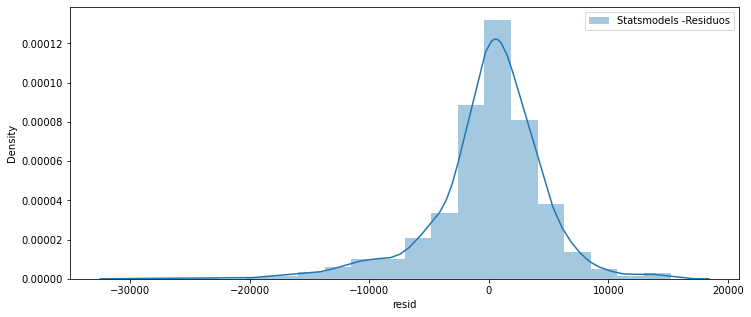

In [55]:
plt.rcParams['figure.figsize'] = [12,5]
sns.distplot(decomp_diaria_add.resid, bins=20, label="Statsmodels -Residuos")
plt.legend()
plt.show()

##### Conclusión de la descomposición
En el primer gráfico se observa la serie.

El segundo gráfico devuelve la tendencia de la serie, la cual destacamos su negatividad.

El tercer gráfico representa la estacionalidad. Es decir, que se pueden apreciar las fluctuaciones internas que suceden por dentro de la serie.

El grafico "Resid", devuelve el ruido de la serie. Al observar que los residuales, se encuentran sin correlacion alguna y el promedio en general se encuentra fijo en 0, nos lleva a pensar que el rudio de nuestra serie es "White Noise" y estamos ante una serie apta para su modelado.

##### Serie de tiempo - EDA - Frecuencia Semanal
Para poder observar los datos agrupados por semana, creamos una serie de tiempo, resampleada por esa unidad de tiempo.

In [56]:
#Resampleo nuestros datos para agrupar por semana

semanalms = pd.DataFrame()
semanalms = diario.resample('W').sum()
print('DF con Valores Atípicos') 
display(semanalms)

#print()

semanalfs = pd.DataFrame()
print('DF sin Valores Atípicos')
semanalfs  = diariof .resample("w").sum()
display(semanalfs)

DF con Valores Atípicos


cantidad_pasos
fecha                     
2016-01-03           98963
2016-01-10          342201
2016-01-17          359649
2016-01-24          346217
2016-01-31          348221
...                    ...
2019-12-08          282891
2019-12-15          272960
2019-12-22          292881
2019-12-29          226390
2020-01-05           55970

[210 rows x 1 columns]

DF sin Valores Atípicos


cantidad_pasos
fecha                     
2016-01-03        98963.00
2016-01-10       342201.00
2016-01-17       359649.00
2016-01-24       346217.00
2016-01-31       348221.00
...                    ...
2019-12-08       282891.00
2019-12-15       272960.00
2019-12-22       292881.00
2019-12-29       226390.00
2020-01-05        55970.00

[210 rows x 1 columns]

Como se puede observar, la semana inicial y final de la serie, no cuenta con los 7 días. Es por ello, que hay una baja sustancial en la cantidad de pases.

Con el objetivo de equilibrar la desproporción registrada en la primer y última semana, volvemos a resamplear los objetos creados pero ésta vez con el promedio.

In [57]:
#Resampleo nuestros datos para agrupar por semana

semanalm = pd.DataFrame()
semanalm = diario.resample('W').mean()
print('DF con Valores Atípicos') 
display(semanalm)

#print()

semanalf = pd.DataFrame()
print('DF sin Valores Atípicos')
semanalf  = diariof .resample("w").mean()
display(semanalf)


DF con Valores Atípicos


cantidad_pasos
fecha                     
2016-01-03        32987.67
2016-01-10        48885.86
2016-01-17        51378.43
2016-01-24        49459.57
2016-01-31        49745.86
...                    ...
2019-12-08        40413.00
2019-12-15        38994.29
2019-12-22        41840.14
2019-12-29        32341.43
2020-01-05        27985.00

[210 rows x 1 columns]

DF sin Valores Atípicos


cantidad_pasos
fecha                     
2016-01-03        32987.67
2016-01-10        48885.86
2016-01-17        51378.43
2016-01-24        49459.57
2016-01-31        49745.86
...                    ...
2019-12-08        40413.00
2019-12-15        38994.29
2019-12-22        41840.14
2019-12-29        32341.43
2020-01-05        27985.00

[210 rows x 1 columns]

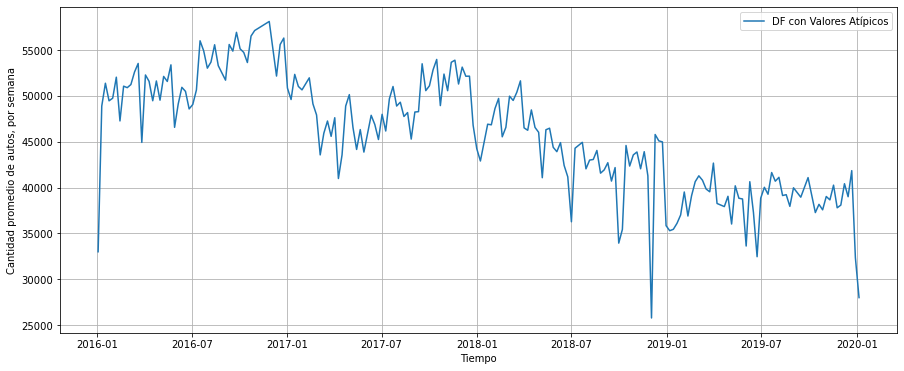

In [58]:
plt.figure(figsize = (15,6))
plt.plot(semanalm.index, semanalm.cantidad_pasos, label = "DF con Valores Atípicos")

plt.xlabel('Tiempo')
plt.ylabel('Cantidad promedio de autos, por semana')
plt.grid()
plt.legend()
plt.show()

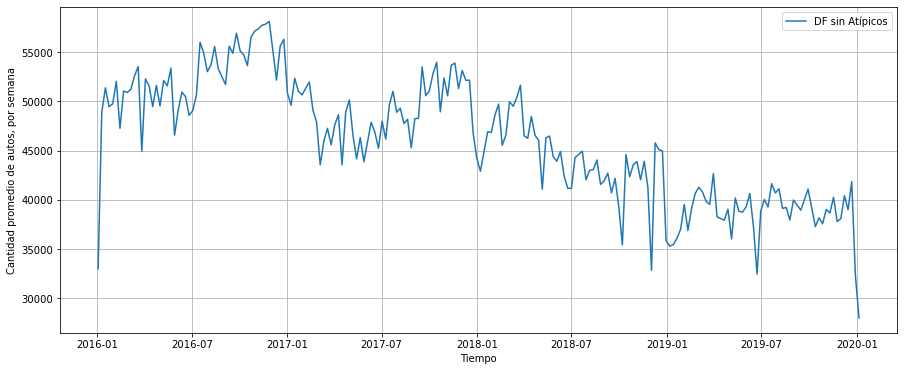

In [59]:
plt.figure(figsize = (15,6))
plt.plot(semanalf.index, semanalf.cantidad_pasos, label = "DF sin Atípicos")

plt.xlabel('Tiempo')
plt.ylabel('Cantidad promedio de autos, por semana')
plt.grid()
plt.legend()
plt.show()

In [60]:
print('Estadísticos - DF Mean sin Valores Atípicos') 
display(semanalf.describe())

Estadísticos - DF Mean sin Valores Atípicos


cantidad_pasos
count          210.00
mean         45968.55
std           6151.03
min          27985.00
25%          40861.11
50%          46311.07
75%          50999.64
max          58119.57

##### Valores Faltantes

In [61]:
semanalf.index.to_series().diff().value_counts()

7 days    209
Name: fecha, dtype: int64

Diferencia de 7 días, por lo cual no hay Valores Faltantes.

#### Autocorrelación

In [62]:
#Un año

weeks = 52 # Cantidad de semanas en 1 año.
years = 1 # Cantidad de años observados.

nlags= weeks*years           
autocorr = stattools.acf(semanalf, nlags = nlags)
autocorr.shape

(53,)

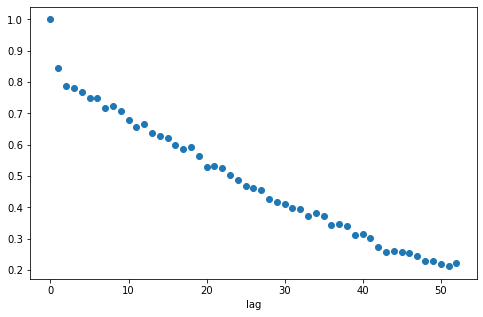

<Figure size 1080x1080 with 0 Axes>

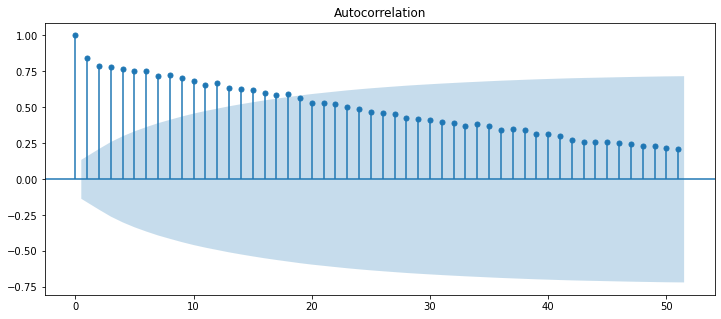

In [63]:
# Plot Autorcorrelación
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.show()

# Plot Autorcorrelación
plt.figure(figsize = (15,15))
plot_acf(semanalf, lags = np.arange(nlags))
plt.show()

In [64]:
# Dos años
weeks = 52 # Cantidad de semanas en 1 año.
years = 2 # Cantidad de años observados.

nlags= weeks*years           
autocorr = stattools.acf(semanalf, nlags= nlags)
autocorr.shape

(105,)

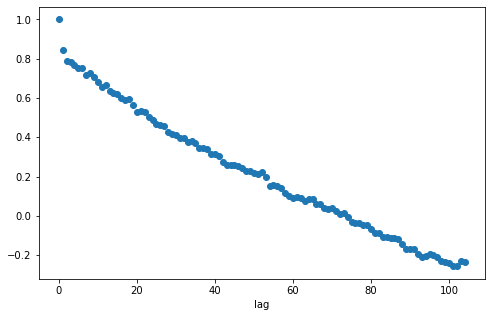

<Figure size 1080x1080 with 0 Axes>

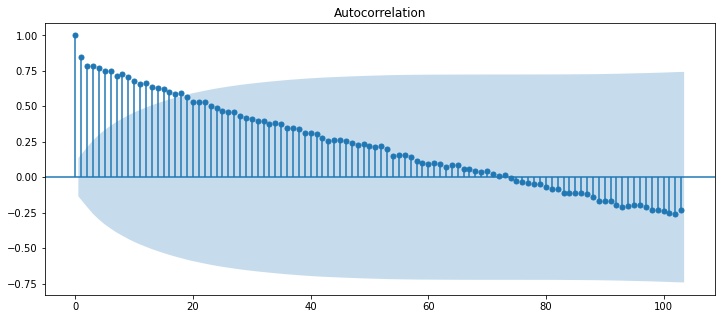

In [65]:
# Plot Autorcorrelación
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.show()

# Plot Autorcorrelación
plt.figure(figsize = (15,15))
plot_acf(semanalf, lags = np.arange(nlags))
plt.show()

In [66]:
# Tres años
weeks = 52 # Cantidad de semanas en 1 año.
years = 3 # Cantidad de años observados.

nlags= weeks*years           
autocorr = stattools.acf(semanalf, nlags= nlags)
autocorr.shape

(157,)

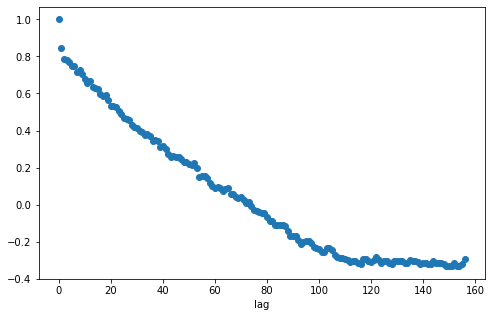

<Figure size 1080x1080 with 0 Axes>

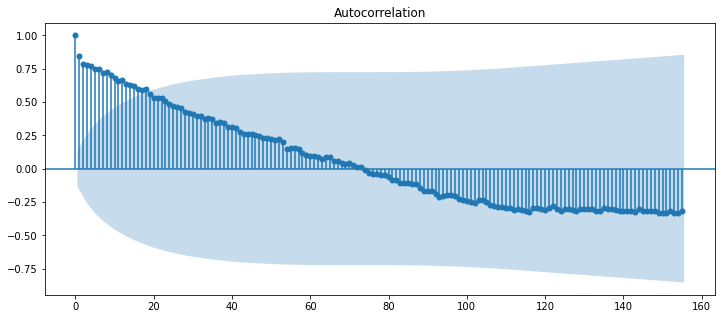

In [67]:
# Plot Autorcorrelación
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.show()

# Plot Autorcorrelación
plt.figure(figsize = (15,15))
plot_acf(semanalf, lags = np.arange(nlags))
plt.show()

In [68]:
# Cuatro años

weeks = 52 # Cantidad de semanas en 1 año.
years = 4 # Cantidad de años observados.

nlags= weeks*years           
autocorr = stattools.acf(semanalf, nlags= nlags)
autocorr.shape

(209,)

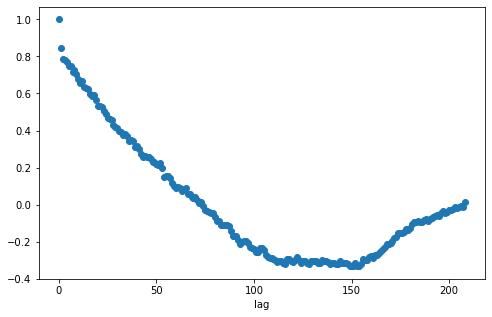

<Figure size 1080x1080 with 0 Axes>

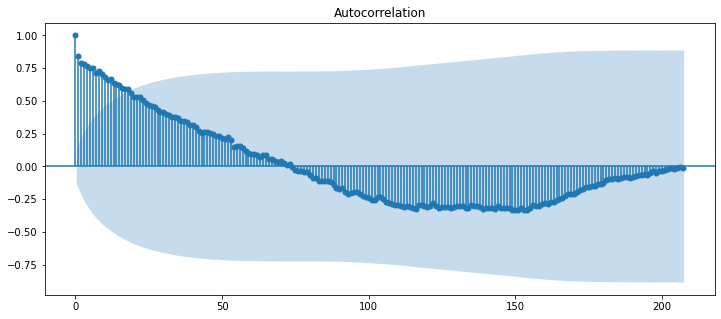

In [69]:
# Plot Autorcorrelación
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.show()

# Plot Autorcorrelación
plt.figure(figsize = (15,15))
plot_acf(semanalf, lags = np.arange(nlags))
plt.show()

Conclusión Autocorrelaciones

La observacion de los intervalos de confianza en los datos no cambia significativamente cuando los observamos en una frecuncia semanal.

##### Descomposición de la serie

##### Modelo aditivo

In [70]:
decomp_semanal_add = tsa.seasonal.seasonal_decompose(
    semanalf.cantidad_pasos, model='additive', extrapolate_trend='freq'
)

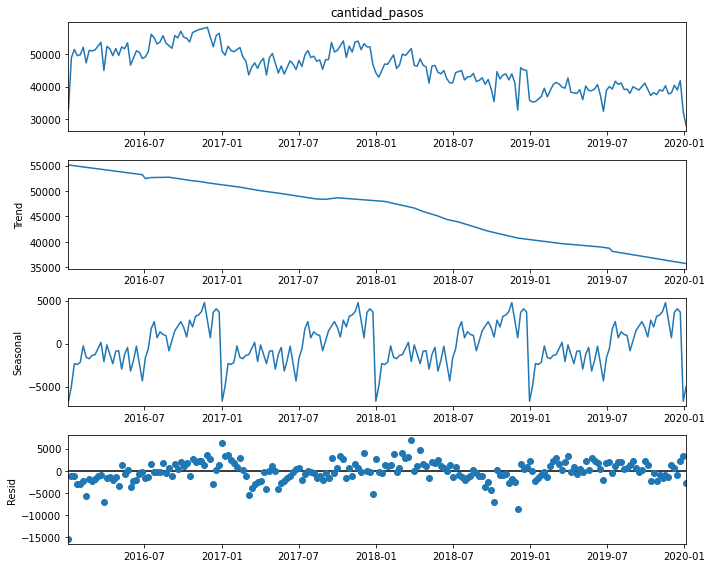

In [71]:
plt.rcParams['figure.figsize'] = [10,8]
decomp_semanal_add.plot()
plt.show()

Conclusión de la descomposición
Trend devuelve la tendencia semanal, la cual expone mejor aún la tendencia negativa de la serie.

Seasonal muestra las fluctuaciones internas de la serie. En esta frecuencia se puede apreciar mejor la estacionalidad. Está bien marcada, los picos (tanto negativos como positivos) se presentan en los mismos períodos de tiempo a lo largo de los 4 años.

Resid refiere al ruido de la serie. Se sigue apreciando un comportamiento completamenta aletarorio en los datos.

##### Histograma residuales

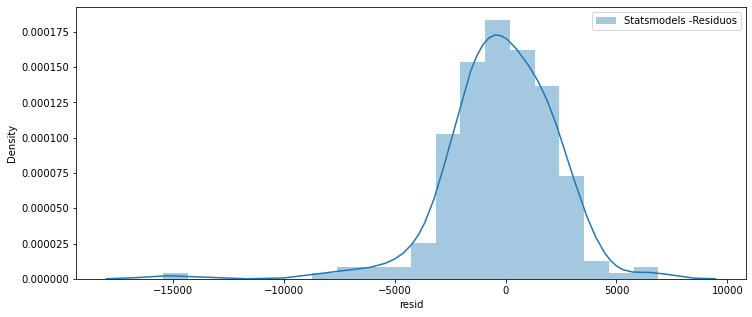

In [72]:
plt.rcParams['figure.figsize'] = [12,5]
sns.distplot(decomp_semanal_add.resid, bins=20, label="Statsmodels -Residuos")
plt.legend()
plt.show()

Podríamos decir que la frecuencia semanal es la más atinada para el modelado y predicción del último trimestre del 2019 y el año 2020.

### Serie de tiempo - EDA - Frecuencia Mensual
Para poder observar los datos agrupados por mes, creamos una serie de tiempo, resampleada por esa unidad de tiempo.


#### Resampleo por sumatoria

In [73]:
#Resampleo nuestros datos para agrupar por mes

mensualm = diario.resample("M").sum()
print('DF con Valores Atípicos') 
display(mensualm.tail())
print()

print('DF sin Valores Atípicos') 
mensualf= diariof.resample("M").sum()
display(mensualf.tail())

DF con Valores Atípicos


cantidad_pasos
fecha                     
2019-08-31         1223990
2019-09-30         1194001
2019-10-31         1177647
2019-11-30         1184560
2019-12-31         1151645


DF sin Valores Atípicos


cantidad_pasos
fecha                     
2019-08-31      1223990.00
2019-09-30      1194001.00
2019-10-31      1177647.00
2019-11-30      1184560.00
2019-12-31      1151645.00

In [74]:
print('Estadísticos - DF con Valores Atípicos') 
display(mensualm.describe())

print()

print('Estadísticos - DF sin Valores Atípicos')
display(mensualf.describe())

Estadísticos - DF con Valores Atípicos


cantidad_pasos
count           48.00
mean       1397645.92
std         180015.41
min        1103086.00
25%        1239572.00
50%        1400840.00
75%        1526092.50
max        1710827.00


Estadísticos - DF sin Valores Atípicos


cantidad_pasos
count           48.00
mean       1402122.92
std         176751.25
min        1103086.00
25%        1246526.25
50%        1407800.00
75%        1526092.50
max        1710827.00

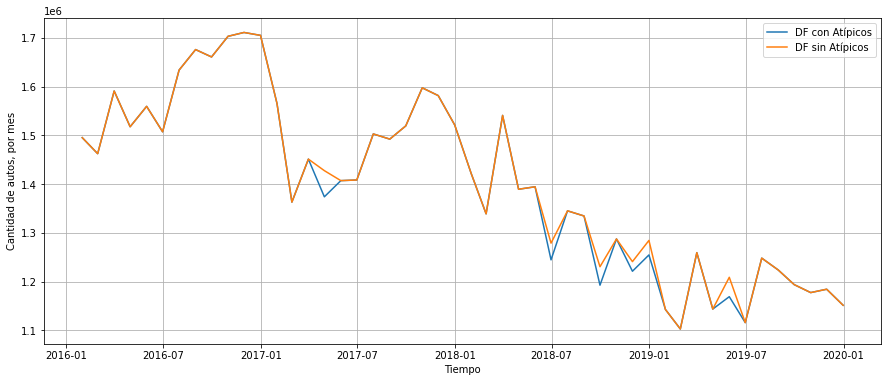

In [75]:
plt.figure(figsize = (15,6))
plt.plot(mensualm.index, mensualm.cantidad_pasos, label = "DF con Atípicos")
plt.plot(mensualf.index, mensualf.cantidad_pasos, label = "DF sin Atípicos")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.grid()
plt.legend()
plt.show()

Resampleando a frecuencia mensual, se presenta más pronunciadamente la tendencia negativa en la serie.

En enero de 2017, comienza una caida que se detiene en Febrero - Marzo, repuntando hasta finales de octubre - noviembre de 2017 generando un nuevo pico positivo.

Se produce nuevamente una caida en los meses posteriores hasta fines de febrero de 2018.

En marzo de 2018 hay un nuevo pico positivo, pero la tendencia comienza a ser negativa de forma estable

#### Valores Faltantes

Esperados:

Mes con 28 días = Febrero. (3 en total)
Mes con 29 días = Febrero. (1 en total - año bisiesto)
Meses con 30 días = Abril, Junio, Septiembre y Noviembre. (4 meses por 4 años)
Meses con 31 días = Enero, Marzo, Mayo, Julio, Agosto, Octubre y Diciembre. (7 meses por 4 años)

In [76]:
mensualf.index.to_series().diff().value_counts()

31 days    27
30 days    16
28 days     3
29 days     1
Name: fecha, dtype: int64

Por algún motivo en el resampleo a frecuencia mensual, cuando cuenta la cantidad de instancias que se encuentran en el resampleo, en los meses que tienen 31 días nos devuelve 1 mes entero menos.

El numero debería de ser 28 ya que son 7 meses en el año que tienen 31 días. En otras palabras, 7(meses) x 4(años) = 28 (cantidad de meses observados).

##### Autocorrelación

In [77]:
# Un año
months = 12 # Cantidad de semanas en 1 año.
years = 1 # Cantidad de años observados.

nlags= months*years           
autocorr = stattools.acf(mensualf, nlags= nlags)
autocorr.shape

(13,)

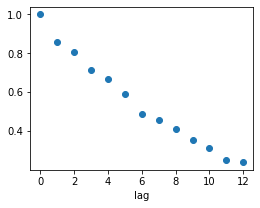

<Figure size 1080x1080 with 0 Axes>

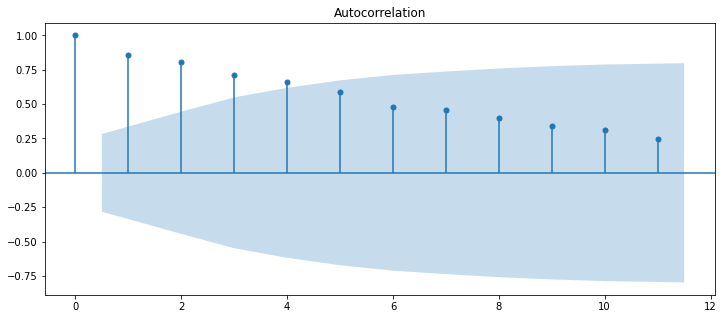

In [78]:
# Plot Autorcorrelación
plt.figure(figsize = (4,3))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.show()

# Plot Autorcorrelación
plt.figure(figsize = (15,15))
plot_acf(mensualm, lags = np.arange(nlags))
plt.show()

In [79]:
#Dos años
months = 12 # Cantidad de semanas en 1 año.
years = 2 # Cantidad de años observados.

nlags= months*years           
autocorr = stattools.acf(mensualf, nlags= nlags)
autocorr.shape

(25,)

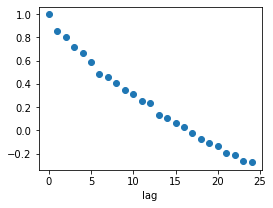

<Figure size 1080x1080 with 0 Axes>

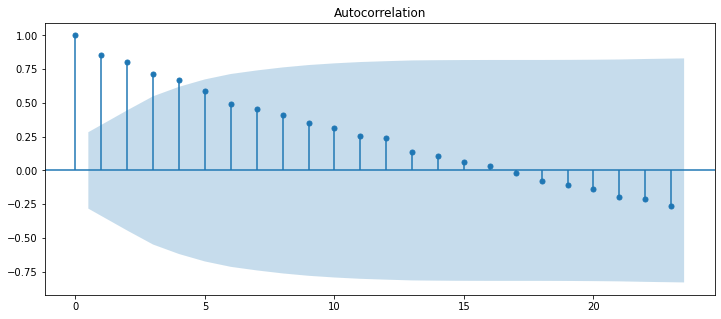

In [80]:
# Plot Autorcorrelación
plt.figure(figsize = (4,3))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.show()

# Plot Autorcorrelación
plt.figure(figsize = (15,15))
plot_acf(mensualf, lags = np.arange(nlags))
plt.show()

In [81]:
# Tres años
months = 12 # Cantidad de semanas en 1 año.
years = 3 # Cantidad de años observados.

nlags= months*years           
autocorr = stattools.acf(mensualf, nlags= nlags)
autocorr.shape

(37,)

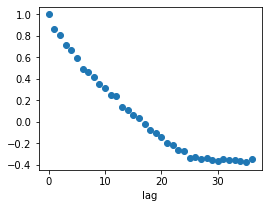

<Figure size 1080x1080 with 0 Axes>

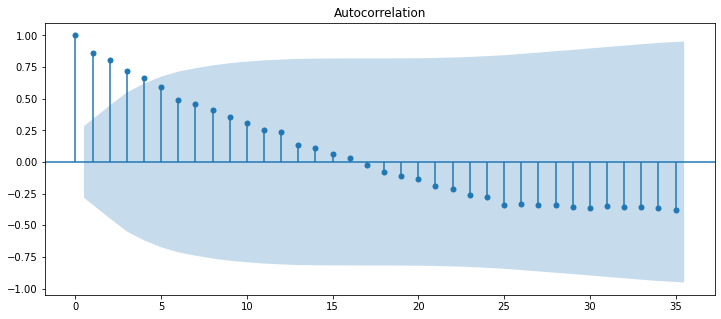

In [82]:
# Plot Autorcorrelación
plt.figure(figsize = (4,3))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.show()

# Plot Autorcorrelación
plt.figure(figsize = (15,15))
plot_acf(mensualf, lags = np.arange(nlags))
plt.show()

#### Conclusión Autocorrelaciones
La frecuencia mensual se vuelve mucho más fácil de entender a través de su gráfico. Más que nada al momento de buscar los intervalos de confianza.

Con la serie mensual puede detectar con mayor claridad dónde están los datos que conservan interés para la predicción.

##### Descomposición de la Serie

In [83]:
decomp_mensual_add = tsa.seasonal.seasonal_decompose(
    mensualf.cantidad_pasos, model='additive', extrapolate_trend='freq'
)

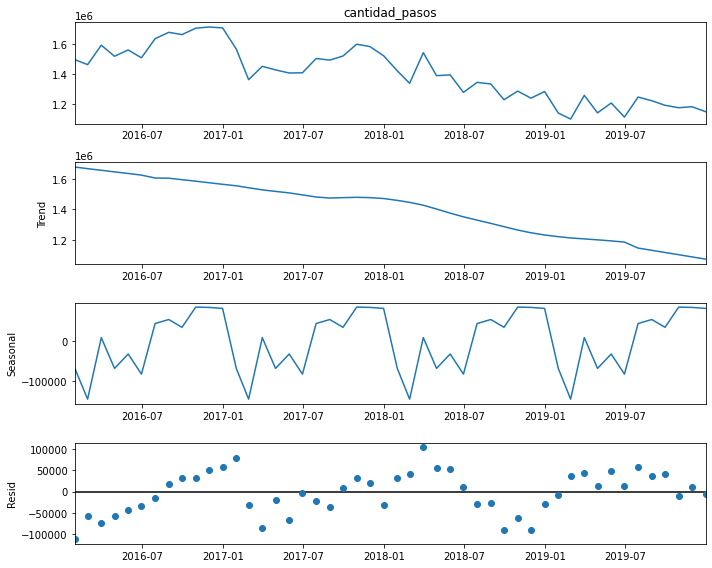

In [84]:
plt.rcParams['figure.figsize'] = [10,8]
decomp_mensual_add.plot()
plt.show()

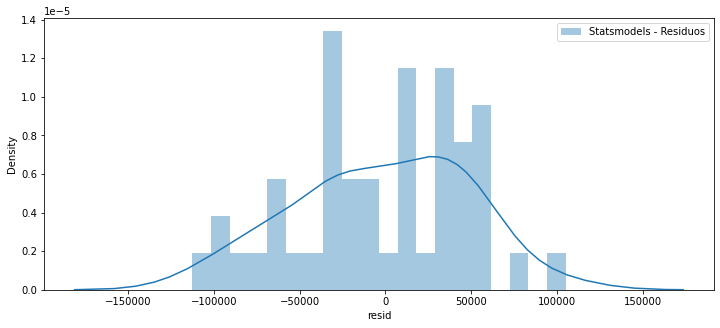

In [85]:
# Histograma de los Residuales
plt.rcParams['figure.figsize'] = [12,5]
sns.distplot(decomp_mensual_add.resid, bins=20, label="Statsmodels - Residuos")
plt.legend()
plt.show()

##### Conclusión de resampleo Frecuencia Mensual
Resamplear la serie a una frecuencia mensual resulta informativo para entender la tendencia de la serie y la autocorrelación.

Frecuencia mensual es útil para poder estudiar comportamientos a grandes rasgos.

Para predecir el último trimestre de 2019 y el año de 2020, la frecuencia semanal la concidero más oportuna.

#### Conclusión EDA
La serie no cuenta con valores faltantes, hemos detectado valores atípicos, y los mismos fueron tratados. La serie es apta para su modelado dado que es una serie estacionaria y los resids se consideran white noise.

Por otro lado, nos encontramos con un dataset con tendencia claramente negativa. Esto nos lleva a buscar explicaciones por fuera del dataset.

Realizando una investigación, encontramos notas periodísticas que apuntan al aumento del combustible y de las tarifas de los peajes como principal causa en la reducción del uso del automovil. Generando un incremento en el uso de trenes, colectivos y subtes.

En conclusión, los registros en la autopista Illia se ven directamente afectados por:

Los aumentos de tarifas de combustible y peajes.

Medidas del gobierno para promover el uso de menos autos para ir a la ciudad.

Inauguración del Paseo del Bajo el cual condiciona a los vehículos pesados a transitar por otras vías.

Incorporación de Telepase.

Como mejoras de implementación a futuro, se podría agregar al dataset:

La variable "precio de combustible". Para observar que a medida que el precio del combustible asciende el flujo de vehículos desciende.

La variable "tarifa de peaje". Para observar que a medida que aumenta, produce un descenso de vehículos en la autopista.

Por último, se define utilizar una frecuencia semanal para la predición de datos. Dado que es la frecuencia que pierde menos información sin sobre exigir a los modelos.

## Predicciones a futuro

Dado que nuestros objetivos son predecir el último trimestre de 2019 y el año 2020, procederemos a generar un dataset con los datos reales que contamos focalizandonos sólo en estos dos últimos años.

De esta manera, podremos verificar la eficacia de los resultados predichos.

##### Datos 2019
Para el año 2019 ya contamos con la información necesaria:

In [86]:
mask = np.logical_and(data_2019.estacion=='Illia', (data_2019.forma_pago == 'EFECTIVO'))
df_2019r = data_2019[mask].copy()
df_2019r.drop(columns = ['hora_inicio','estacion'], inplace = True)
df_2019r

periodo       fecha  hora_fin     dia    sentido tipo_vehiculo  \
80         2019  2019-01-01         2  Martes     Centro       Liviano   
86         2019  2019-01-01         2  Martes     Centro        Pesado   
88         2019  2019-01-01         2  Martes  Provincia       Liviano   
94         2019  2019-01-01         2  Martes  Provincia        Pesado   
149        2019  2019-01-01         3  Martes     Centro       Liviano   
...         ...         ...       ...     ...        ...           ...   
812010     2019  2019-12-31        22  Martes  Provincia       Liviano   
812016     2019  2019-12-31        22  Martes  Provincia        Pesado   
812080     2019  2019-12-31        23  Martes     Centro       Liviano   
812085     2019  2019-12-31        23  Martes  Provincia       Liviano   
812131     2019  2019-12-31         0  Martes     Centro       Liviano   

       forma_pago  cantidad_pasos  
80       EFECTIVO             537  
86       EFECTIVO               1  
88       EFECTIVO             443  
94       EFECTIVO               1  
149      EFECTIVO             769  
...           ...             ...  
812010   EFECTIVO             556  
812016   EFECTIVO               1  
812080   EFECTIVO             214  
812085   EFECTIVO             190  
812131   EFECTIVO               4  

[34643 rows x 8 columns]

##### Datos 2020


In [87]:
data_2020

periodo                fecha        mes        dia  dia_fecha  \
0        2020.00  2020-01-01 00:00:00      enero  Miércoles       1.00   
1        2020.00  2020-01-01 00:00:00      enero  Miércoles       1.00   
2        2020.00  2020-01-01 00:00:00      enero  Miércoles       1.00   
3        2020.00  2020-01-01 00:00:00      enero  Miércoles       1.00   
4        2020.00  2020-01-01 00:00:00      enero  Miércoles       1.00   
...          ...                  ...        ...        ...        ...   
2533738  2020.00           2020-12-31  diciembre     Jueves      31.00   
2533739  2020.00           2020-12-31  diciembre     Jueves      31.00   
2533740  2020.00           2020-12-31  diciembre     Jueves      31.00   
2533741  2020.00           2020-12-31  diciembre     Jueves      31.00   
2533742  2020.00           2020-12-31  diciembre     Jueves      31.00   

         hora_inicio  hora_fin                          estacion  \
0               0.00      1.00                           ALBERDI   
1               0.00      1.00                           ALBERDI   
2               0.00      1.00                           ALBERDI   
3               0.00      1.00                           ALBERDI   
4               0.00      1.00                           ALBERDI   
...              ...       ...                               ...   
2533738        21.00     22.00  DELLEPIANE LINIERSLEPIANE CENTRO   
2533739        21.00     22.00                DELLEPIANE LINIERS   
2533740        21.00     22.00                               ILP   
2533741        22.00     23.00                               ILP   
2533742        23.00      0.00                DELLEPIANE LINIERS   

          tipo_vehiculo forma_pago                       observacion  \
0                  Auto   Efectivo                          Efectivo   
1                  Auto   Efectivo                          Efectivo   
2                  Auto  Rec.Deuda                Paso en Infracción   
3                  Auto  Rec.Deuda  Paso en infracción con Multa LPR   
4                  Auto  Rec.Deuda  Paso en infracción con Multa LPR   
...                 ...        ...                               ...   
2533738  Pesados 6 Ejes        Tag                 Tag - PosPago OCR   
2533739  Pesados 6 Ejes        Tag                     Tag - PosPago   
2533740  Pesados 6 Ejes        Tag                     Tag - PosPago   
2533741  Pesados 6 Ejes        Tag                     Tag - PosPago   
2533742  Pesados 6 Ejes        Tag                 Tag - PosPago OCR   

           sentido  cantidad_pasos  
0           Centro           24.00  
1        Provincia           80.00  
2        Provincia            1.00  
3           Centro            1.00  
4        Provincia            1.00  
...            ...             ...  
2533738     Centro            1.00  
2533739  Provincia            1.00  
2533740     Centro            1.00  
2533741     Centro            2.00  
2533742  Provincia            1.00  

[2533743 rows x 13 columns]

In [88]:
print('Forma de Pago en 2020')
print(data_2020['forma_pago'].unique())

Forma de Pago en 2020
['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']


In [89]:
mask = np.logical_and(data_2020.estacion=='ILLIA', (data_2020.forma_pago == 'Efectivo'))
df_2020r = data_2020[mask].copy()
df_2020r.drop(columns = ['observacion','hora_inicio','estacion'], inplace = True)
df_2020r

periodo                fecha        mes        dia  dia_fecha  \
52       2020.00  2020-01-01 00:00:00      enero  Miércoles       1.00   
53       2020.00  2020-01-01 00:00:00      enero  Miércoles       1.00   
134      2020.00  2020-01-01 00:00:00      enero  Miércoles       1.00   
135      2020.00  2020-01-01 00:00:00      enero  Miércoles       1.00   
202      2020.00  2020-01-01 00:00:00      enero  Miércoles       1.00   
...          ...                  ...        ...        ...        ...   
2532216  2020.00           2020-12-24  diciembre     Jueves      24.00   
2532227  2020.00           2020-12-24  diciembre     Jueves      24.00   
2532271  2020.00           2020-12-24  diciembre     Jueves      24.00   
2532928  2020.00           2020-12-28  diciembre      Lunes      28.00   
2533497  2020.00           2020-12-30  diciembre  Miércoles      30.00   

         hora_fin   tipo_vehiculo forma_pago    sentido  cantidad_pasos  
52           1.00            Auto   Efectivo     Centro          326.00  
53           1.00            Auto   Efectivo  Provincia          319.00  
134          2.00            Auto   Efectivo     Centro          199.00  
135          2.00            Auto   Efectivo  Provincia          180.00  
202          3.00            Auto   Efectivo     Centro          114.00  
...           ...             ...        ...        ...             ...  
2532216     12.00  Pesados 6 Ejes   Efectivo  Provincia            1.00  
2532227     13.00  Pesados 6 Ejes   Efectivo  Provincia            1.00  
2532271     18.00  Pesados 6 Ejes   Efectivo     Centro            1.00  
2532928     13.00  Pesados 6 Ejes   Efectivo  Provincia            1.00  
2533497     14.00  Pesados 6 Ejes   Efectivo  Provincia            4.00  

[52374 rows x 10 columns]

##### Unificación
Unificamos los años que realmente nos importan para poder contrastar los datos predichos con los reales de estos períodos.

In [90]:
df19_20 = pd.concat([df_2019r, df_2020r])
df19_20

periodo       fecha  hora_fin        dia    sentido   tipo_vehiculo  \
80       2019.00  2019-01-01      2.00     Martes     Centro         Liviano   
86       2019.00  2019-01-01      2.00     Martes     Centro          Pesado   
88       2019.00  2019-01-01      2.00     Martes  Provincia         Liviano   
94       2019.00  2019-01-01      2.00     Martes  Provincia          Pesado   
149      2019.00  2019-01-01      3.00     Martes     Centro         Liviano   
...          ...         ...       ...        ...        ...             ...   
2532216  2020.00  2020-12-24     12.00     Jueves  Provincia  Pesados 6 Ejes   
2532227  2020.00  2020-12-24     13.00     Jueves  Provincia  Pesados 6 Ejes   
2532271  2020.00  2020-12-24     18.00     Jueves     Centro  Pesados 6 Ejes   
2532928  2020.00  2020-12-28     13.00      Lunes  Provincia  Pesados 6 Ejes   
2533497  2020.00  2020-12-30     14.00  Miércoles  Provincia  Pesados 6 Ejes   

        forma_pago  cantidad_pasos        mes  dia_fecha  
80        EFECTIVO          537.00        NaN        NaN  
86        EFECTIVO            1.00        NaN        NaN  
88        EFECTIVO          443.00        NaN        NaN  
94        EFECTIVO            1.00        NaN        NaN  
149       EFECTIVO          769.00        NaN        NaN  
...            ...             ...        ...        ...  
2532216   Efectivo            1.00  diciembre      24.00  
2532227   Efectivo            1.00  diciembre      24.00  
2532271   Efectivo            1.00  diciembre      24.00  
2532928   Efectivo            1.00  diciembre      28.00  
2533497   Efectivo            4.00  diciembre      30.00  

[87017 rows x 10 columns]

In [91]:
# Generamos las transformaciones

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
df19_20['fecha2'] = pd.to_datetime(df19_20.fecha) + pd.to_timedelta(df19_20.hora_fin, unit = 'h')

#Quitamos las columnas que ya no vamos a utilizar
df19_20.drop(columns=['periodo', 'dia','dia_fecha','fecha','hora_fin','forma_pago'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
df19_20.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reordenamos el dataset por fecha
df19_20.sort_values('fecha', inplace = True)
df19_20.reset_index(drop=True, inplace = True)

In [92]:
df19_20_d = pd.DataFrame()
df19_20_d = df19_20.resample('d', on = 'fecha').sum()


df19_20_s = pd.DataFrame()
df19_20_s = df19_20_d.resample("W").mean()
df19_20_s


cantidad_pasos
fecha                     
2019-01-06        37399.17
2019-01-13        35439.57
2019-01-20        36088.14
2019-01-27        37002.71
2019-02-03        39509.71
...                    ...
2020-12-06         9797.14
2020-12-13         9347.86
2020-12-20        10511.14
2020-12-27         9633.43
2021-01-03        10356.75

[105 rows x 1 columns]

In [93]:
# Genero dataframe para graficar
df19_20_sg = pd.DataFrame()
df19_20_sg = df19_20_s.reset_index()
df19_20_sg.rename(columns = {'fecha':'Fecha'}, inplace = True) 
df19_20_sg




Fecha  cantidad_pasos
0   2019-01-06        37399.17
1   2019-01-13        35439.57
2   2019-01-20        36088.14
3   2019-01-27        37002.71
4   2019-02-03        39509.71
..         ...             ...
100 2020-12-06         9797.14
101 2020-12-13         9347.86
102 2020-12-20        10511.14
103 2020-12-27         9633.43
104 2021-01-03        10356.75

[105 rows x 2 columns]

#### Predicción último trimestre 2019

La métrica de evaluación elegida para medir el error de los modelos es RMSE. Dado que la serie fue curada de valores atípicos.

##### Benchmark
Para el modelo Benchmark, tomaremos los valores del 3er trimentre de 2019, calcular el promedio con pandas -rollingwindow- y finalmente medir su RMSE por sobre los valores del 4to trimestre de 2019.

In [94]:
# 3er Trimestre 2019
start_date = '2019-07-01'
end_date = '2019-09-30'
X = semanalf[(semanalf.index >= start_date) & (semanalf.index <= end_date)]

# 4to Trimestre 2019
start_date = '2019-10-01'
end_date = '2019-12-31'
Y = semanalf[(semanalf.index >= start_date) & (semanalf.index <= end_date)]

# Predicción
Y_t = X.cantidad_pasos.rolling(window=1, center=True).mean()
benchmark_rmse = np.sqrt(mean_squared_error(Y,Y_t))

# Genero el dataframe para graficar
benchmark_results = pd.DataFrame()
benchmark_results = Y.reset_index()
benchmark_results.rename(columns = {'fecha':'Fecha'}, inplace = True) 
benchmark_results.rename(columns = {'cantidad_pasos':'Real'}, inplace = True) 

In [95]:
from plotly import express as px
from plotly import graph_objects as go
from plotly import figure_factory as ff
from plotly.subplots import make_subplots


# Plot 
text_title = 'Benchmark - AU Illia - Predicción Pago en efectivo - RMSE ' + str(round(benchmark_rmse,2))
fig_predict = px.line(title=text_title)

fig_predict.add_scatter(y=benchmark_results['Real'], mode='lines+markers', name="Real")
fig_predict.add_scatter(y=Y_t, mode='lines+markers', name="Predicho")

fig_predict.update_layout(
    width=1000,
    height=500,)
fig_predict.show()

#### Conclusión
El modelo Benchmark tiene un buen desempeño en cuanto a la predicción. Devuelve un error RMSE bajo (3000 aprox.). Si bien se acerca a los valores e incluso atina uno de los puntos, en general se encuentra desfasado.

Veamos qué sucede trabajando con otro modelos y realizando una mejora de hiperparámetros.

## Predicción a Futuro - Ultimo trimestre 2019

##### XGBoost Regressor
Para el modelo XGBoost, tendremos que preparar los datos. Realizar el train/test split, entrenar el modelo, predecir y calcular el error.

In [96]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit

# Preparación de datos
data_XGB = semanalf.cantidad_pasos

N = data_XGB.shape[0]
print(N)

210


¿Por qué hay 210 resultados, cuando "deberíamos" obtener 208 (52*4)?

Esto se debe a que dada la frecuencia semanal, si observamos el calendario, encontramos que:

El año 2017 es el único año que termina "su última semana" del año el 31 de diciembre.
El año 2016 termina su "última semana" el 1ro de enero de 2017.
El año 2018 terminan su "última semana" el 30 de diciembre.
El año 2019 terminan su "última semana" el 29 de diciembre.
Para cerrar cada año, se agrega una semana con el objetivo de acaparar todas las fechas del mismo (hasta el 31 de Diciembre).

En consecuencia, nos encontramos con 2 semanas más de datos. Una más por el año 2018 y otra más por el año 2019.

In [97]:
look_back = 12 # Numero de semanas anteriores para predecir el valor siguiente.

X = np.zeros((N - look_back - 1, look_back))
Y = np.zeros(N - look_back - 1)

print(X.shape, Y.shape)

(197, 12) (197,)


In [98]:
# Llenado de datos
for i in range(X.shape[0]):
    X[i,:] = data_XGB.iloc[i:i+look_back]
    Y[i] = data_XGB.iloc[i+look_back]

In [99]:
print('Tamaño de X')
print(X.shape)
print()
print('Valores de X')
print(X)

Tamaño de X
(197, 12)

Valores de X
[[32987.66666667 48885.85714286 51378.42857143 ... 51234.28571429
  52603.71428571 53537.57142857]
 [48885.85714286 51378.42857143 49459.57142857 ... 52603.71428571
  53537.57142857 44919.42857143]
 [51378.42857143 49459.57142857 49745.85714286 ... 53537.57142857
  44919.42857143 52280.28571429]
 ...
 [39989.57142857 41081.14285714 38926.14285714 ... 37785.71428571
  38079.28571429 40413.        ]
 [41081.14285714 38926.14285714 37262.85714286 ... 38079.28571429
  40413.         38994.28571429]
 [38926.14285714 37262.85714286 38163.85714286 ... 40413.
  38994.28571429 41840.14285714]]


In [100]:
print('Tamaño de Y')
print(Y.shape)
print()
print('Valores de Y')
print(Y)

Tamaño de Y
(197,)

Valores de Y
[44919.42857143 52280.28571429 51581.57142857 49467.14285714
 51625.42857143 49531.57142857 52121.85714286 51574.28571429
 53385.28571429 46565.71428571 49113.85714286 50931.71428571
 50490.         48575.         49060.85714286 50644.71428571
 56011.14285714 54911.57142857 53023.         53691.57142857
 55578.14285714 53296.14285714 52524.28571429 51713.71428571
 55606.71428571 54884.71428571 56933.14285714 55136.14285714
 54740.71428571 53638.71428571 56525.71428571 57130.57142857
 57371.         57738.         57847.42857143 58119.57142857
 54914.         52161.28571429 55605.42857143 56308.
 50852.57142857 49601.71428571 52344.71428571 51030.71428571
 50654.42857143 51343.         51967.71428571 49125.28571429
 47913.57142857 43558.28571429 45927.71428571 47256.28571429
 45583.28571429 47613.85714286 48639.57142857 43558.85714286
 48889.28571429 50135.14285714 46553.57142857 44153.14285714
 46320.         43864.85714286 45705.28571429 47878.14285714

##### Train / Test Split

In [101]:
N_train = 197 - look_back        # Cantidad de semanas que uso para entrenar
N_test = 12                      # Cantidad de semanas que uso para evaluar.

N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
Y_train = Y[:N_train]
print(X_train.shape, Y_train.shape)

X_test = X[N_train:N_train+N_test,:]
Y_test = Y[N_train:N_train+N_test]
print(X_test.shape, Y_test.shape)

(185, 12) (185,)
(12, 12) (12,)


##### Entrenamiento

In [102]:
xgbr_def= XGBRegressor(objective= "reg:squarederror", eval_metric= 'rmse')

In [103]:
xgbr_def.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

##### Cross Validation

In [104]:
tss = TimeSeriesSplit(n_splits=2)

In [105]:
best_score_train = abs(cross_val_score(
    xgbr_def, X_train, Y_train, cv=tss, scoring="neg_root_mean_squared_error")
)
best_score_test = abs(cross_val_score(
    xgbr_def, X_test, Y_test, cv=tss,  scoring="neg_root_mean_squared_error"))

print("Mejor Score en Train (CV = 10) %0.2f (+/- %0.2f)" %
      (best_score_train.mean(), best_score_train.std()))

print("Mejor Score en Test (CV = 10) %0.2f (+/- %0.2f)" %
      (best_score_test.mean(), best_score_test.std()))

Mejor Score en Train (CV = 10) 3211.46 (+/- 437.12)
Mejor Score en Test (CV = 10) 2429.12 (+/- 1608.59)


##### Predicción

In [106]:
Y_train_pred_xgb= xgbr_def.predict(X_train)
Y_test_pred_xgb= xgbr_def.predict(X_test)

In [107]:
rmse_train_xgb = np.sqrt(mean_squared_error(Y_train, Y_train_pred_xgb))
#r2_train_rf = metrics.r2_score(Y_train, Y_train_pred_rf)

rmse_test_xgb_best = np.sqrt(mean_squared_error(Y_test, Y_test_pred_xgb))
#r2_test_rf = metrics.r2_score(Y_test, Y_test_pred_rf)

print(f"XGBRegressor en Train")
print("-----------------------")
print(f"RMSE-Train: ", rmse_train_xgb)
#print(f"r2_score-Train: ", r2_train_rf)
print("\n")
print(f"XGBRegressor en Test")
print("-----------------------")
print(f"RMSE-Test: ", rmse_test_xgb_best)
#print(f"r2_score-Test: ", r2_test_rf)

XGBRegressor en Train
-----------------------
RMSE-Train:  0.509083260030529


XGBRegressor en Test
-----------------------
RMSE-Test:  2826.725310451282


Hemos logrado una reducción del error con el modelo XGBoost. Pero si observamos el train vs el test del RMSE se evidencia un overfitting.

##### Gráfico

Veamos como se comportan los datos obtenidos con este modelo.

In [108]:
# Plot 
text_title = 'XGBoost - AU Illia - Predicción Pago en efectivo - RMSE ' + str(round(rmse_test_xgb_best,2))
fig_predict = px.line(semanalf, title=text_title)

fig_predict.add_scatter(x=data_XGB.index[:length_total], y=data_XGB, mode='lines+markers', name="Real")
fig_predict.add_scatter(x=data_XGB.index[:N_train + look_back], y=data_XGB[:N_train + look_back], mode='lines', name="Datos de Entrenamiento")
fig_predict.add_scatter(x=data_XGB.index[look_back: look_back + N_train], y=Y_train_pred_xgb, mode='lines+markers', name="Train-Pred")
fig_predict.add_scatter(x=data_XGB.index[N_train+look_back: length_total], y=Y_test_pred_xgb, mode='lines+markers', name="Test-pred")
fig_predict.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_predict.update_layout(
    width=1050,
    height=500,)
fig_predict.show()

Podemos apreciar los datos reales, también destacados en color rojo para una mejor lectura. Los representados en color verde, son el resultado del entrenamiento y predicción.

Finalmente, en color violeta, se muestra la predicción del último trimestre del 2019.

Hagamos una observación acotando el rango de fechas:

In [109]:
fig_predict.update_xaxes(range=['2019-10-01', '2019-12-31'])
fig_predict.show()

Ahora es posible observar como se acercan los datos de predicción con los reales, obteniendo incluso más puntos de contacto que en el beckmark.

##### Conclusión
El modelo XGBoost tiene un mejor desempeño que el benchmark. Devuelve un error RMSE inferior (2650 aprox.)

Si bien se acerca a los valores e incluso acierta aún más los puntos, continúa desfasado.

Veamos qué sucede trabajando con una optimización de hiperparámetros.



#### XGBoostR Optimizado

La idea del XGBoost, es ir entrenando modelos simples y que cada uno vaya aprendiendo de los errores del anterior, por lo que, para seguir con la simplicidad de los modelos, no vamos a entrenar un XGBoost con profundidad mayor a 4 para y evitar la complejización del modelo.

##### Preparación de datos

Utilizaremos lo realizado ya para el modelo sin optimizar

In [110]:
X_train

array([[32987.66666667, 48885.85714286, 51378.42857143, ...,
        51234.28571429, 52603.71428571, 53537.57142857],
       [48885.85714286, 51378.42857143, 49459.57142857, ...,
        52603.71428571, 53537.57142857, 44919.42857143],
       [51378.42857143, 49459.57142857, 49745.85714286, ...,
        53537.57142857, 44919.42857143, 52280.28571429],
       ...,
       [38837.85714286, 40022.85714286, 39264.57142857, ...,
        39967.85714286, 39467.28571429, 38941.71428571],
       [40022.85714286, 39264.57142857, 41633.        , ...,
        39467.28571429, 38941.71428571, 39989.57142857],
       [39264.57142857, 41633.        , 40688.85714286, ...,
        38941.71428571, 39989.57142857, 41081.14285714]])

In [111]:
Y_train

array([44919.42857143, 52280.28571429, 51581.57142857, 49467.14285714,
       51625.42857143, 49531.57142857, 52121.85714286, 51574.28571429,
       53385.28571429, 46565.71428571, 49113.85714286, 50931.71428571,
       50490.        , 48575.        , 49060.85714286, 50644.71428571,
       56011.14285714, 54911.57142857, 53023.        , 53691.57142857,
       55578.14285714, 53296.14285714, 52524.28571429, 51713.71428571,
       55606.71428571, 54884.71428571, 56933.14285714, 55136.14285714,
       54740.71428571, 53638.71428571, 56525.71428571, 57130.57142857,
       57371.        , 57738.        , 57847.42857143, 58119.57142857,
       54914.        , 52161.28571429, 55605.42857143, 56308.        ,
       50852.57142857, 49601.71428571, 52344.71428571, 51030.71428571,
       50654.42857143, 51343.        , 51967.71428571, 49125.28571429,
       47913.57142857, 43558.28571429, 45927.71428571, 47256.28571429,
       45583.28571429, 47613.85714286, 48639.57142857, 43558.85714286,
      

##### Búsqueda de Hiperparámetros

In [112]:
param_grid = {'nthread':[1, 2], 
              'objective':['reg:squarederror'],
              'learning_rate': np.arange(.1, 1, .1), 
              'max_depth': [1, 2, 3, 4],
              'colsample_bytree': np.arange(.1, 1, .1),
              'n_estimators': [10, 40, 50, 100]}


model= GridSearchCV(xgbr_def,
                    param_grid,
                    scoring = 'neg_root_mean_squared_error',
                    verbose = 3,
                    cv=tss)

##### Entrenamiento


In [113]:
model.fit(X_train, Y_train)

Fitting 2 folds for each of 2592 candidates, totalling 5184 fits
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.1, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.1, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.1, max_depth=1, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.1, max_depth=1, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.1, max_depth=1, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.1, max_depth=1, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.1, max_depth=1, n_estimators=40,

[CV 1/2] END colsample_bytree=0.1, learning_rate=0.1, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.1, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.2, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.2, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.2, max_depth=1, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.2, max_depth=1, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.2, max_depth=1, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 

[CV 2/2] END colsample_bytree=0.1, learning_rate=0.2, max_depth=4, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.2, max_depth=4, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.2, max_depth=4, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.2, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.2, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.30000000000000004, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.30000000000000004, max_depth=1, n_estimators=10, nthread=1, objective=reg:squ

[CV 1/2] END colsample_bytree=0.1, learning_rate=0.30000000000000004, max_depth=4, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.30000000000000004, max_depth=4, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.30000000000000004, max_depth=4, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.30000000000000004, max_depth=4, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.30000000000000004, max_depth=4, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.30000000000000004, max_depth=4, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0

[CV 2/2] END colsample_bytree=0.1, learning_rate=0.4, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.4, max_depth=4, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.4, max_depth=4, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.4, max_depth=4, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.4, max_depth=4, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.4, max_depth=4, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.4, max_depth=4, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/

[CV 2/2] END colsample_bytree=0.1, learning_rate=0.5, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.5, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.5, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.5, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.5, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.5, max_depth=4, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.5, max_depth=4, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1

[CV 2/2] END colsample_bytree=0.1, learning_rate=0.6, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.6, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.6, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.6, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.6, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.6, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.6, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV

[CV 2/2] END colsample_bytree=0.1, learning_rate=0.7000000000000001, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.7000000000000001, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.7000000000000001, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.7000000000000001, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.7000000000000001, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.7000000000000001, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.7000

[CV 1/2] END colsample_bytree=0.1, learning_rate=0.8, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.8, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.8, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.8, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.8, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.8, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.8, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2

[CV 1/2] END colsample_bytree=0.1, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.9, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.1, learning_rate=0.9, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.1, learning_rate=0.9, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/

[CV 1/2] END colsample_bytree=0.2, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.1, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.1, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.1, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[C

[CV 1/2] END colsample_bytree=0.2, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.2, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.2, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.2, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[C

[CV 2/2] END colsample_bytree=0.2, learning_rate=0.30000000000000004, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.30000000000000004, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.30000000000000004, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.30000000000000004, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.30000000000000004, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.30000000000000004, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.

[CV 2/2] END colsample_bytree=0.2, learning_rate=0.4, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.4, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.4, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.4, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.4, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.4, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.4, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV

[CV 2/2] END colsample_bytree=0.2, learning_rate=0.5, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.5, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.5, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.5, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.5, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.5, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.5, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[C

[CV 2/2] END colsample_bytree=0.2, learning_rate=0.6, max_depth=2, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.6, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.6, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.6, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.6, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.6, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.6, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 

[CV 1/2] END colsample_bytree=0.2, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.7000000000000001, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.7000000000000001, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.700

[CV 1/2] END colsample_bytree=0.2, learning_rate=0.8, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.8, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.8, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 

[CV 1/2] END colsample_bytree=0.2, learning_rate=0.9, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.9, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.2, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.2, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[C

[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.1, max_depth=2, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.1, max_depth=2, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.1, max_depth=2, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.1, max_depth=2, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.1, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.1, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, l

[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.2, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.2, max_depth=2, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.2, max_depth=2, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.2, max_depth=2, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.2, max_depth=2, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.2, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, l

[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.30000000000000004, max_depth=1, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.30000000000000004, max_depth=1, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.30000000000000004, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.30000000000000004, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.30000000000000004, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.30000000000000004, max_depth=2, n_estimators=10, nthread=1,

[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.30000000000000004, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.4, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.4, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.4, max_depth=1, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.4, max_depth=1, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.4, max_depth=1, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.300

[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.4, max_depth=4, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.4, max_depth=4, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.4, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.4, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.5, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.5, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.3000000000000000

[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.5, max_depth=4, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.5, max_depth=4, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.5, max_depth=4, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.5, max_depth=4, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.5, max_depth=4, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.5, max_depth=4, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, 

[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.6, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.6, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.6, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.6, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.6, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.6, max_depth=4, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, 

[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.7000000000000001, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.7000000000000001, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.7000000000000001, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.7000000000000001, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.7000000000000001, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.7000000000000001, max_depth=3, n_estimators=100, nthread=2, object

[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.8, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.8, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, 

[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.30000000000000004, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.30000000000000004, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.3000000000000000

[CV 1/2] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/

[CV 1/2] END colsample_bytree=0.4, learning_rate=0.2, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.2, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.2, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.2, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.2, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.2, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.2, max_depth=2, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 

[CV 2/2] END colsample_bytree=0.4, learning_rate=0.30000000000000004, max_depth=1, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.30000000000000004, max_depth=1, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.30000000000000004, max_depth=1, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.30000000000000004, max_depth=1, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.30000000000000004, max_depth=1, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.30000000000000004, max_depth=1, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.

[CV 1/2] END colsample_bytree=0.4, learning_rate=0.30000000000000004, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.30000000000000004, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.4, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.4, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.4, max_depth=1, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.4, max_depth=1, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.4, max_depth=1, n_estimators=40, nthread=1, objective=reg:squar

[CV 2/2] END colsample_bytree=0.4, learning_rate=0.4, max_depth=4, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.4, max_depth=4, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.4, max_depth=4, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.4, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.4, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.5, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.5, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[C

[CV 1/2] END colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV

[CV 1/2] END colsample_bytree=0.4, learning_rate=0.6, max_depth=4, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.6, max_depth=4, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.6, max_depth=4, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.6, max_depth=4, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.6, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.6, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.7000000000000001, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total 

[CV 1/2] END colsample_bytree=0.4, learning_rate=0.7000000000000001, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.7000000000000001, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.7000000000000001, max_depth=4, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.7000000000000001, max_depth=4, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.7000000000000001, max_depth=4, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.7000000000000001, max_depth=4, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.7000000

[CV 2/2] END colsample_bytree=0.4, learning_rate=0.8, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.8, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.8, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.8, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.8, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.8, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.8, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[C

[CV 2/2] END colsample_bytree=0.4, learning_rate=0.9, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.9, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.9, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.9, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.9, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.4, learning_rate=0.9, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.4, learning_rate=0.9, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV

[CV 1/2] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 

[CV 1/2] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV

[CV 2/2] END colsample_bytree=0.5, learning_rate=0.30000000000000004, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.30000000000000004, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.30000000000000004, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.30000000000000004, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.30000000000000004, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.30000000000000004, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=

[CV 2/2] END colsample_bytree=0.5, learning_rate=0.4, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.4, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.4, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.4, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.4, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.4, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.4, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[C

[CV 2/2] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[C

[CV 2/2] END colsample_bytree=0.5, learning_rate=0.6, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.6, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.6, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.6, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.6, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.6, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.6, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 

[CV 2/2] END colsample_bytree=0.5, learning_rate=0.7000000000000001, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.7000000000000001, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.7000000000000001, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.7000000000000001, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.7000000000000001, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.7000000000000001, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.7000000

[CV 1/2] END colsample_bytree=0.5, learning_rate=0.8, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.8, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.8, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.8, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[C

[CV 2/2] END colsample_bytree=0.5, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV

[CV 1/2] END colsample_bytree=0.6, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 

[CV 2/2] END colsample_bytree=0.6, learning_rate=0.2, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.2, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.2, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[C

[CV 1/2] END colsample_bytree=0.6, learning_rate=0.30000000000000004, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.30000000000000004, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.30000000000000004, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.30000000000000004, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.30000000000000004, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.30000000000000004, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate

[CV 2/2] END colsample_bytree=0.6, learning_rate=0.4, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.4, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.4, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.4, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.4, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.4, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.4, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV

[CV 1/2] END colsample_bytree=0.6, learning_rate=0.5, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.5, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.5, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.5, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.5, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.5, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.5, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[C

[CV 2/2] END colsample_bytree=0.6, learning_rate=0.6, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.6, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.6, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.6, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.6, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.6, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.6, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV

[CV 2/2] END colsample_bytree=0.6, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.7000000000000001, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.7000000000000001, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.7000000000000001, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.7000

[CV 1/2] END colsample_bytree=0.6, learning_rate=0.8, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.8, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.8, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.8, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.8, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[C

[CV 2/2] END colsample_bytree=0.6, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.6, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.6, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV

[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.1, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.1, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, lear

[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.2, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.2, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, lear

[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.30000000000000004, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.30000000000000004, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.30000000000000004, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.30000000000000004, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.30000000000000004, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.30000000000000004, max_depth=2, n_estimators=100, nthread=1, objecti

[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.4, max_depth=1, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.4, max_depth=1, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.4, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.4, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.4, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.4, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, lear

[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.5, max_depth=1, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.5, max_depth=1, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.5, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.5, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.5, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.5, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, lear

[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.6, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.6, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.6, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.6, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.6, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.6, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learni

[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.7000000000000001, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.7000000000000001, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.7000000000000001, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.7000000000000001, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.7000000000000001, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.7000000000000001, max_depth=2, n_estimators=10, nthread=2, objective=reg

[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.7000000000000001, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.7000000000000001, max_depth=4, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.8, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.8, max_depth=1, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.8, max_depth=1, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.8, max_depth=1, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_byt

[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.8, max_depth=4, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.8, max_depth=4, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.8, max_depth=4, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.8, max_depth=4, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.8, max_depth=4, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.8, max_depth=4, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning

[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.9, max_depth=3, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.9, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.9, max_depth=3, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.9, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learning_rate=0.9, max_depth=4, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.7000000000000001, learning_rate=0.9, max_depth=4, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.7000000000000001, learn

[CV 2/2] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/

[CV 2/2] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/

[CV 1/2] END colsample_bytree=0.8, learning_rate=0.30000000000000004, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.30000000000000004, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.30000000000000004, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.30000000000000004, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.30000000000000004, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.30000000000000004, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.3

[CV 2/2] END colsample_bytree=0.8, learning_rate=0.4, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.4, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.4, max_depth=3, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.4, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.4, max_depth=3, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.4, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.4, max_depth=3, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/

[CV 2/2] END colsample_bytree=0.8, learning_rate=0.5, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.5, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.5, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.5, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.5, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.5, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.5, max_depth=3, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1

[CV 2/2] END colsample_bytree=0.8, learning_rate=0.6, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.6, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.6, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.6, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.6, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.6, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.6, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV

[CV 2/2] END colsample_bytree=0.8, learning_rate=0.7000000000000001, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.7000000000000001, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.700

[CV 1/2] END colsample_bytree=0.8, learning_rate=0.8, max_depth=2, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.8, max_depth=2, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.8, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.8, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.8, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.8, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.8, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2

[CV 1/2] END colsample_bytree=0.8, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.9, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.9, max_depth=3, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[C

[CV 2/2] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[C

[CV 1/2] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[C

[CV 1/2] END colsample_bytree=0.9, learning_rate=0.30000000000000004, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.30000000000000004, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.30000000000000004, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.30000000000000004, max_depth=2, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.30000000000000004, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.30000000000000004, max_depth=2, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate

[CV 1/2] END colsample_bytree=0.9, learning_rate=0.4, max_depth=2, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.4, max_depth=2, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.4, max_depth=2, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.4, max_depth=2, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.4, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.4, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.4, max_depth=2, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/

[CV 1/2] END colsample_bytree=0.9, learning_rate=0.5, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.5, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.5, max_depth=2, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.5, max_depth=2, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.5, max_depth=2, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.5, max_depth=2, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.5, max_depth=2, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/

[CV 1/2] END colsample_bytree=0.9, learning_rate=0.6, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.6, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.6, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.6, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.6, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.6, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.6, max_depth=2, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 

[CV 1/2] END colsample_bytree=0.9, learning_rate=0.7000000000000001, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.7000000000000001, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.7000000000000001, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.7000000000000001, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.7000000000000001, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.7000000000000001, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.70000

[CV 2/2] END colsample_bytree=0.9, learning_rate=0.8, max_depth=1, n_estimators=40, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.8, max_depth=1, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.8, max_depth=1, n_estimators=50, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.8, max_depth=1, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.8, max_depth=1, n_estimators=50, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.8, max_depth=1, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.8, max_depth=1, n_estimators=100, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 

[CV 1/2] END colsample_bytree=0.9, learning_rate=0.9, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.9, max_depth=1, n_estimators=100, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.9, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.9, max_depth=2, n_estimators=10, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.9, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 2/2] END colsample_bytree=0.9, learning_rate=0.9, max_depth=2, n_estimators=10, nthread=2, objective=reg:squarederror; total time=   0.0s
[CV 1/2] END colsample_bytree=0.9, learning_rate=0.9, max_depth=2, n_estimators=40, nthread=1, objective=reg:squarederror; total time=   0.0s
[CV 

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, eval_metric='rmse',
                                    gamma=0, gpu_id=-1, importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_...
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             param_grid={'colsample_bytree': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
   

##### Best params

In [114]:
pd.DataFrame(model.cv_results_).sort_values("rank_test_score").head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2129           0.00          0.00             0.00            0.00   
2128           0.01          0.01             0.00            0.00   
2009           0.01          0.01             0.01            0.01   
2008           0.00          0.00             0.01            0.01   
2015           0.04          0.01             0.01            0.01   

     param_colsample_bytree param_learning_rate param_max_depth  \
2129                    0.8                 0.4               3   
2128                    0.8                 0.4               3   
2009                    0.7                 0.9               4   
2008                    0.7                 0.9               4   
2015                    0.7                 0.9               4   

     param_n_estimators param_nthread   param_objective  \
2129                 10             2  reg:squarederror   
2128                 10             1  reg:squarederror   
2009                 10             2  reg:squarederror   
2008                 10             1  reg:squarederror   
2015                100             2  reg:squarederror   

                                                 params  split0_test_score  \
2129  {'colsample_bytree': 0.8, 'learning_rate': 0.4...           -2675.23   
2128  {'colsample_bytree': 0.8, 'learning_rate': 0.4...           -2675.23   
2009  {'colsample_bytree': 0.7000000000000001, 'lear...           -3050.33   
2008  {'colsample_bytree': 0.7000000000000001, 'lear...           -3050.33   
2015  {'colsample_bytree': 0.7000000000000001, 'lear...           -3048.19   

      split1_test_score  mean_test_score  std_test_score  rank_test_score  
2129           -3063.41         -2869.32          194.09                1  
2128           -3063.41         -2869.32          194.09                1  
2009           -2771.19         -2910.76          139.57                3  
2008           -2771.19         -2910.76          139.57                3  
2015           -2779.50         -2913.85          134.35                5

In [115]:
model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.4,
 'max_depth': 3,
 'n_estimators': 10,
 'nthread': 1,
 'objective': 'reg:squarederror'}

In [116]:
# Asigno los parámetros a las variables
colsample_bytree = model.best_params_['colsample_bytree']
learning_rate = model.best_params_['learning_rate']
max_depth = model.best_params_['max_depth']
n_estimators = model.best_params_['n_estimators']
nthread = model.best_params_['nthread']
objective = model.best_params_['objective']

In [117]:
abs(model.best_score_)

2869.3204252925107

##### Entrenamiento con Hiperparámetros

In [118]:
xgbr = XGBRegressor(
                  colsample_bytree = colsample_bytree,
                  learning_rate = learning_rate,
                  max_depth = max_depth,
                  n_estimators = n_estimators,
                  n_thread = nthread,
                  objective = objective,
                  eval_metric= 'rmse')

xgbr.fit(X_train, Y_train)

[11:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_thread } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.4, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4, n_thread=1,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [119]:
best_score_train = abs(cross_val_score(
    xgbr, X_train, Y_train, cv=tss, scoring="neg_root_mean_squared_error")
)
best_score_test = abs(cross_val_score(
    xgbr, X_test, Y_test, cv=tss,  scoring="neg_root_mean_squared_error"))

print("Mejor Score en Train (CV = 10) %0.2f (+/- %0.2f)" %
      (best_score_train.mean(), best_score_train.std()))

print("Mejor Score en Test (CV = 10) %0.2f (+/- %0.2f)" %
      (best_score_test.mean(), best_score_test.std()))

[11:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_thread } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_thread } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:39:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_thread } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

##### Predicción

In [120]:
Y_train_pred_xgb = xgbr.predict(X_train)
Y_test_pred_xgb = xgbr.predict(X_test)


In [121]:
rmse_train_xgbr = np.sqrt(mean_squared_error(Y_train, Y_train_pred_xgb))
rmse_test_xgbr = np.sqrt(mean_squared_error(Y_test, Y_test_pred_xgb))

print(f"XGBRegressor en Train")
print("-----------------------")
print(f"RMSE-Train: ", rmse_train_xgbr)
print("\n")
print(f"XGBRegressor en Test")
print("-----------------------")
print(f"RMSE-Test: ", rmse_test_xgbr)

XGBRegressor en Train
-----------------------
RMSE-Train:  1775.5330723712402


XGBRegressor en Test
-----------------------
RMSE-Test:  2262.83972286767


In [122]:
xgb_results_pred_2019 = pd.DataFrame()
xgb_results_pred_2019['fecha'] = data_XGB.index[N_train+look_back: length_total]
xgb_results_pred_2019['Pred XGB'] = Y_test_pred_xgb
xgb_results_pred_2019

fecha  Pred XGB
0  2019-10-13  38429.00
1  2019-10-20  39020.29
2  2019-10-27  39296.20
3  2019-11-03  38429.00
4  2019-11-10  37829.33
5  2019-11-17  38983.82
6  2019-11-24  39943.30
7  2019-12-01  38153.09
8  2019-12-08  38153.09
9  2019-12-15  39363.53
10 2019-12-22  38707.92
11 2019-12-29  38172.56

##### Gráfico

In [123]:
# Plot 
text_title = 'XGBoost con Hiperparámetros - AU Illia - Predicción Pago en efectivo - RMSE ' + str(round(rmse_test_xgbr,2))
fig_predict = px.line(semanalf, title=text_title)

fig_predict.add_scatter(x=data_XGB.index[:length_total], y=data_XGB, mode='lines+markers', name="Real")
fig_predict.add_scatter(x=data_XGB.index[:N_train + look_back], y=data_XGB[:N_train + look_back], mode='lines', name="Datos de Entrenamiento")
fig_predict.add_scatter(x=data_XGB.index[look_back: look_back + N_train], y=Y_train_pred_xgb, mode='lines+markers', name="Train-Pred")
fig_predict.add_scatter(x=data_XGB.index[N_train+look_back: length_total], y=Y_test_pred_xgb, mode='lines+markers', name="Test-pred")
fig_predict.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_predict.update_layout(
    width=1000,
    height=500,)
fig_predict.show()

In [124]:
fig_predict.update_xaxes(range=['2019-10-01', '2019-12-31'])
fig_predict.show()

##### Importance Features

¿Qué variables fueron relevantes para el modelo para hacer la predicción?

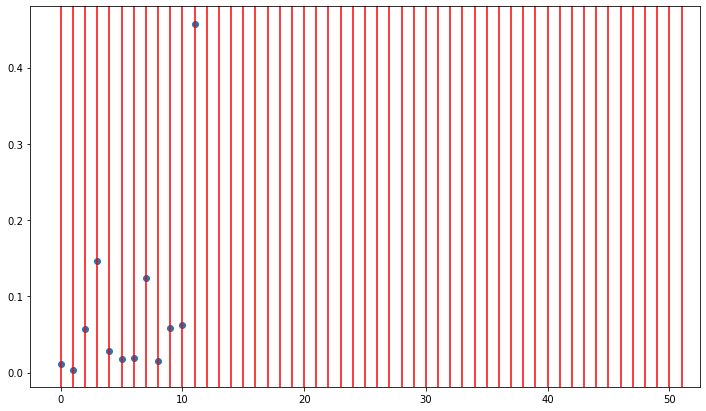

In [125]:
plt.figure(figsize = (12,7))

plt.scatter(np.arange(xgbr.feature_importances_.size),xgbr.feature_importances_)

for x in range(52):
    plt.axvline(x, linestyle ='-', color= 'r')
    
plt.show()

De las 12 semanas utilizadas para predecir el valor siguiente, XGBoost Regressor le otorga mayor "importancia" a las que se encuentran al final. La más importante es la semana 11 del trimestre.

##### Conclusión

El modelo XGBoost optimizado tiene un mejor desempeño que el XGBoost original. Devuelve un error RMSE inferior (2300 aprox.)

Si bien se acerca a los valores e incluso acierta aún más los puntos, la mejora obtenida es baja y continúa desfasado.

### Predicción año 2020

Para predecir el 2020, utilizaremos nuestro modelo XGBoost regressor optimizado. 

Crearemos nuestros datos de entrenamiento y luego mediante la estrategia Multi-Step prediction, realizaremos la predicción de las 52 semanas del 2020.

Es decir, se predicen las semanas de a una, incorporando la última predicha como dato para predecir la siguiente. 

Este método puede llegar a tener una gran desventaja. Si el modelo no es preciso, arrastraremos los errores en cada predicción.

#### Preparación de datos

In [126]:
start_date = '2019-10-07'
end_date = '2019-12-29'

XGB_predict = semanalf[(semanalf.index >= start_date) & (semanalf.index <= end_date)].values
XGB_predict.shape

(12, 1)

In [127]:
XGB_predict

array([[37262.85714286],
       [38163.85714286],
       [37564.28571429],
       [39018.42857143],
       [38648.        ],
       [40255.71428571],
       [37785.71428571],
       [38079.28571429],
       [40413.        ],
       [38994.28571429],
       [41840.14285714],
       [32341.42857143]])

In [128]:
XGB_predict = XGB_predict.reshape(1,-1)
XGB_predict.shape

(1, 12)

##### Predicción

In [129]:
i = 0
result_predict = []
    
while (i <=51):
    val_predict = xgbr.predict(XGB_predict)
    #print('val_predict:', val_predict)
    new_predict = XGB_predict
    new_predict = np.append(new_predict, val_predict) #agregar la predicción al último elemento
    new_predict = np.delete(new_predict, 0) #eliminar el primer elemento
    new_predict = new_predict.reshape(1,-1)
    result_predict.append(val_predict.tolist())
    XGB_predict = new_predict
    i = i+1  

In [130]:
#result_predict

In [131]:
resultados_2020 = np.asarray(result_predict)
resultados_2020.shape


(52, 1)

In [132]:
pd.date_range('2020-01','2021-01', freq='W')
df_result_2020 = pd.DataFrame(pd.date_range('2020-01','2021-01', freq='W'))
df_result_2020.rename(columns = {0:'Fecha'}, inplace = True) 
df_result_2020['Prediccion'] = resultados_2020
df_st_result_2020 = df_result_2020.set_index(['Fecha'])


In [133]:
xgb_results_pred_2020 = pd.DataFrame()
xgb_results_pred_2020['Real'] = df19_20_s['cantidad_pasos']
xgb_results_pred_2020['Pred XGB'] = df_st_result_2020['Prediccion']
xgb_results_pred_2020

Real  Pred XGB
fecha                         
2019-01-06  37399.17       NaN
2019-01-13  35439.57       NaN
2019-01-20  36088.14       NaN
2019-01-27  37002.71       NaN
2019-02-03  39509.71       NaN
...              ...       ...
2020-12-06   9797.14  38153.09
2020-12-13   9347.86  38707.92
2020-12-20  10511.14  38153.09
2020-12-27   9633.43  38707.92
2021-01-03  10356.75       NaN

[105 rows x 2 columns]

In [134]:
xgb_results_pred_2020.reset_index(inplace=True)
xgb_results_pred_2020

fecha      Real  Pred XGB
0   2019-01-06  37399.17       NaN
1   2019-01-13  35439.57       NaN
2   2019-01-20  36088.14       NaN
3   2019-01-27  37002.71       NaN
4   2019-02-03  39509.71       NaN
..         ...       ...       ...
100 2020-12-06   9797.14  38153.09
101 2020-12-13   9347.86  38707.92
102 2020-12-20  10511.14  38153.09
103 2020-12-27   9633.43  38707.92
104 2021-01-03  10356.75       NaN

[105 rows x 3 columns]

##### Gráfico

In [135]:
# Plot 
fig_predict = go.Figure()
fig_predict.add_trace(go.Scatter(x=xgb_results_pred_2020['fecha'], y=xgb_results_pred_2020['Real'],
                    mode='lines+markers',
                    name='Real'))
fig_predict.add_trace(go.Scatter(x=xgb_results_pred_2020['fecha'], y=xgb_results_pred_2020['Pred XGB'],
                    mode='lines+markers',
                    name='Prediccion'))

fig_predict.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_predict.update_layout(
    title="XGBoost - AU Illia - Predicción Efectivo - Año 2020",
    width=800,
    height=500,
)
fig_predict.show()

In [136]:
fig_predict.update_xaxes(range=['2019-10-01', '2020-12-31'])
fig_predict.show()

Claramente la situación COVID, restricciones y demas cuestiones ya conocidas a nivel mundial han hecho estragos en terminos de pronostico en cualquier ambito que involucre cuestiones a futuro. 
El modelo elegido, predice sobre las predicciones anteriores obtenidas. Esto genera que no aprenda mientras fluye el tiempo y si hay errores en la predicción, los arrastra.
Como conclución para poder generar una predicción más atinada para el 2020, deberiamos implementar seguramente modelos más complejos y que contengan más parametros en cuenta.

### Para pensar, investigar y, opcionalmente, implementar

##### ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
Por supuesto que se podría incorporar con métodos como el OneHotEncoder. Si nos preguntáramos respectos a si mejorarían las predicciones, seguramente mejoren. De esta forma los modelos tendrían más información que la cantidad de vehículos que pasan y eso permitirá tomar decisiones más atinadas.

##### ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?

In [137]:
# Iniciamos el trabajo sobre los datos para analizar la propuesta

print('Estaciones en 2020')
print(data_2020['estacion'].unique())
print('\nEstaciones en 2019')
print(data_2019['estacion'].unique())
print('\nEstaciones en 2018')
print(data_2018['estacion'].unique())
print('\nEstaciones en 2017')
print(data_2017['estacion'].unique())
print('\nEstaciones en 2016')
print(data_2016['estacion'].unique())

Estaciones en 2020
['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']

Estaciones en 2019
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']

Estaciones en 2018
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']

Estaciones en 2017
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']

Estaciones en 2016
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [138]:
#Realizamos el mismo proceso que realizamos en cada unificación y estandarización de la información

stations = pd.concat([data_2020,data_2019,data_2018,data_2017,data_2016])

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
stations['fecha2'] = pd.to_datetime(stations.fecha) + pd.to_timedelta(stations.hora_fin, unit = 'h')

#Quitamos las columnas que ya no vamos a utilizar
stations.drop(columns=["periodo",'mes','dia','dia_fecha','observacion','sentido','fecha','hora_inicio','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
stations.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reordenamos el dataset por fecha
stations.sort_values('fecha', inplace = True)
stations.reset_index(drop=True, inplace = True)

stations

estacion tipo_vehiculo            forma_pago  cantidad_pasos  \
0             Illia        Pesado              EFECTIVO            1.00   
1             Illia        Pesado                EXENTO            4.00   
2             Illia       Liviano                AUPASS          195.00   
3             Illia       Liviano            INFRACCION            3.00   
4             Illia       Liviano  TARJETA DISCAPACIDAD            7.00   
...             ...           ...                   ...             ...   
7473887       ILLIA          Auto                   Tag           25.00   
7473888       ILLIA          Auto                   Tag           99.00   
7473889       ILLIA          Auto                   Tag          120.00   
7473890     ALBERDI          Auto          Mercado Pago            1.00   
7473891  AVELLANEDA          Moto                   Tag            1.98   

                      fecha  
0       2016-01-01 00:00:00  
1       2016-01-01 00:00:00  
2       2016-01-01 00:00:00  
3       2016-01-01 00:00:00  
4       2016-01-01 00:00:00  
...                     ...  
7473887 2020-12-31 23:00:00  
7473888 2020-12-31 23:00:00  
7473889 2020-12-31 23:00:00  
7473890 2020-12-31 23:00:00  
7473891 2020-12-31 23:00:00  

[7473892 rows x 5 columns]

In [139]:
# Previsualizo modalidades de pago
stations['forma_pago'] = stations['forma_pago'].str.title()
stations['forma_pago'].unique()

array(['Efectivo', 'Exento', 'Aupass', 'Infraccion',
       'Tarjeta Discapacidad', 'No Cobrado', 'Monedero', 'Telepase',
       'Otros', 'T. Discapacidad', 'Tag', 'Rec.Deuda', 'Violación',
       'Tarjeta Magnética', 'Cpp', 'Mercado Pago'], dtype=object)

In [140]:
# Previsualizo estaciones
stations['estacion'] = stations['estacion'].str.title()
stations['estacion'].unique()

array(['Illia', 'Dellepiane Liniers', 'Dellepiane Centro', 'Alberdi',
       'Retiro', 'Sarmiento', 'Avellaneda', 'Salguero', 'Alberti',
       'Dellepiane', 'Pdb', 'Dellepiane Linierslepiane Centro', 'Pb3',
       'Ilp', 'Pb4', 'Pb2', 'Pb1'], dtype=object)

In [141]:
# Unifico estaciones
stations['estacion'] = stations['estacion'].replace({
    'Dellepiane Liniers': 'Dellepiane',
    'Dellepiane Centro': 'Dellepiane',
    'Dellepiane Linierslepiane Centro':'Dellepiane',
    'Dellepiane Linierslepiane Centro':'Dellepiane',
    'Pb1':'PDB',
    'Pb2':'PDB',
    'Pb3':'PDB',
    'Pb4':'PDB',
    'Pdb':'PDB',
    'Ilp':'Illia',
    'Alberti': 'Alberdi',
})

In [142]:
# Verifico estaciones
stations['estacion'].unique()

array(['Illia', 'Dellepiane', 'Alberdi', 'Retiro', 'Sarmiento',
       'Avellaneda', 'Salguero', 'PDB'], dtype=object)

In [143]:
# Genero las series de tiempo

station_1 = stations[stations.estacion == 'Illia']
stations_st1 = pd.DataFrame()
stations_st1 = station_1.resample('m', on = 'fecha').sum()
stations_g1 = stations_st1.reset_index()

station_2 = stations[stations.estacion == 'Dellepiane']
stations_st2 = pd.DataFrame()
stations_st2 = station_2.resample('m', on = 'fecha').sum()
stations_g2 = stations_st2.reset_index()

station_3 = stations[stations.estacion == 'Alberdi']
stations_st3 = pd.DataFrame()
stations_st3 = station_3.resample('m', on = 'fecha').sum()
stations_g3 = stations_st3.reset_index()

station_4 = stations[stations.estacion == 'Retiro']
stations_st4 = pd.DataFrame()
stations_st4 = station_4.resample('m', on = 'fecha').sum()
stations_g4 = stations_st4.reset_index()

station_5 = stations[stations.estacion == 'Sarmiento']
stations_st5 = pd.DataFrame()
stations_st5 = station_5.resample('m', on = 'fecha').sum()
stations_g5 = stations_st5.reset_index()

station_6 = stations[stations.estacion == 'Avellaneda']
stations_st6 = pd.DataFrame()
stations_st6 = station_6.resample('m', on = 'fecha').sum()
stations_g6 = stations_st6.reset_index()

station_7 = stations[stations.estacion == 'Salguero']
stations_st7 = pd.DataFrame()
stations_st7 = station_7.resample('m', on = 'fecha').sum()
stations_g7 = stations_st7.reset_index()

station_8 = stations[stations.estacion == 'PDB']
stations_st8  = pd.DataFrame()
stations_st8 = station_8.resample('m', on = 'fecha').sum()
stations_g8 = stations_st8.reset_index()


In [144]:
# Plot 
fig_station = go.Figure()

fig_station.add_trace(go.Scatter(x=stations_g1['fecha'], y=stations_g1['cantidad_pasos'],
                    mode='lines+markers',
                    name='Illia'))
fig_station.add_trace(go.Scatter(x=stations_g2['fecha'], y=stations_g2['cantidad_pasos'],
                    mode='lines+markers',
                    name='Dellepiane'))
fig_station.add_trace(go.Scatter(x=stations_g3['fecha'], y=stations_g3['cantidad_pasos'],
                    mode='lines+markers',
                    name='Alberdi'))
fig_station.add_trace(go.Scatter(x=stations_g4['fecha'], y=stations_g4['cantidad_pasos'],
                    mode='lines+markers',
                    name='Retiro'))
fig_station.add_trace(go.Scatter(x=stations_g5['fecha'], y=stations_g5['cantidad_pasos'],
                    mode='lines+markers',
                    name='Sarmiento'))
fig_station.add_trace(go.Scatter(x=stations_g6['fecha'], y=stations_g6['cantidad_pasos'],
                    mode='lines+markers',
                    name='Avellaneda'))
fig_station.add_trace(go.Scatter(x=stations_g7['fecha'], y=stations_g7['cantidad_pasos'],
                    mode='lines+markers',
                    name='Salguero'))
fig_station.add_trace(go.Scatter(x=stations_g8['fecha'], y=stations_g8['cantidad_pasos'],
                    mode='lines+markers',
                    name='PDB'))

fig_station.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_station.update_layout(
    title="Tránsito vehicular AUSA 2016 a 2020",
    width=900,
    height=500,
)
fig_station.show()

Claramente el hecho de no conocer bien el lugar de analisis debido a que no soy de Buenos Aires, puede limitar mi analisis y ha generado un gran desafío para la comprensión. De todas maneras puedo inferir en que a grandes razgos todas las estaciones se comportaron de alguna manera similar con respecto a la historia de cada una salvo la situación de la Estación Paseo del Bajo que se inagura y obviamente (entiendo) al ser un alivio para el transito pesado, recibe mayor caudal de vehiculos.


##### ¿Hay algo que te gustaría investigar o probar?

Me gustaría poder probar una red neuronal debido a que entiendo (tuve solo una clase) tiene una potencialidad interesante y quizas al tener ya un conocimiento de la problematica de este proyecto como tambien modelos que pueden ser utilizados como Benchmark, puede ser un proyecto a realizar.

Iniciaría con todas las modalidades de pagos para que el modelo sea mas real y que pueda servir para poder incluso dimensionar la capacidad de utilizada a futuro de la autopista, dimensionar cantidad de cabinas necesarias para obtener ciertos tiempos de espera en horas y días pico. Considerar tambien la columna "Sentido" ya que tratandose de una autopista, el sentido es clave porque la utilización no es la misma. De esta manera terminaríamos generando un modelo que tenga la utilidad explicada.

Como Ingeniero Industrial veo que la potencialidad del modelo pensado de esa manera puede servir con fines mas amplios ademas intentaría agregar cuestiones de futuro como valor del dolar, inflación, combustible y tarifa de peaje.
